# Product Sales Forecasting

### 1.)Problem Statement
#### Product sales forecasting aims to estimate the number of products a store will sell in the future, based on various influencing factors such as:
- store type
- location
-  regional characteristics
-  promotional activities
- temporal variations (such as holidays and seasons).
#### This project focuses on developing a predictive model that uses historical sales data from different stores to forecast sales for upcoming periods.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

#### 2.) Importing the dataset and reading it as a dataframe

In [2]:
df=pd.read_csv("C:/Users/sahay/Downloads/TRAIN.csv")

### Shape of the dataset

In [3]:
df.shape

(188340, 10)

#### Showing top 5 records

In [4]:
df.head()

ID  Store_id Store_Type Location_Type Region_Code        Date  \
0  T1000001         1         S1            L3          R1  2018-01-01   
1  T1000002       253         S4            L2          R1  2018-01-01   
2  T1000003       252         S3            L2          R1  2018-01-01   
3  T1000004       251         S2            L3          R1  2018-01-01   
4  T1000005       250         S2            L3          R4  2018-01-01   

   Holiday Discount  #Order     Sales  
0        1      Yes       9   7011.84  
1        1      Yes      60  51789.12  
2        1      Yes      42  36868.20  
3        1      Yes      23  19715.16  
4        1      Yes      62  45614.52

#### 2.1 Dataset Information
- ID: Unique identifier for each record in the dataset.
- Store_id: Unique identifier for each store.
- Store_Type: Categorization of the store based on its type.
- Location_Type: Classification of the store's location (e.g., urban, suburban).
- Region_Code: Code representing the geographical region where the store is located.
- Date: The specific date on which the data was recorded.
- Holiday: Indicator of whether the date was a holiday (1: Yes, 0: No).
- Discount: Indicates whether a discount was offered on the given date (Yes/No).
- Order: The number of orders received by the store on the specified day.
- Sales: Total sales amount for the store on the given day.


#### 3) Data Checks to Perform
- Check Missing Values
- Check Duplicates
- Check Data type
- Check the number of unique values of each column
- Check statistics of the dataset
- Check various categories present in the different categorical column

### 3.1) Checking Missing Values

In [5]:
df.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

There are no missing values in the dataset

### 3.2) Check duplicates

In [6]:
df.duplicated().sum()

0

There are no duplicated values

#### 3.3) Checking Data Type

In [7]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


#### 3.4) Checking Statsitics of the dataset

In [8]:
df.describe(include='object')

ID Store_Type Location_Type Region_Code        Date Discount
count     188340     188340        188340      188340      188340   188340
unique    188340          4             5           4         516        2
top     T1000001         S1            L1          R1  2018-01-01       No
freq           1      88752         85140       63984         365   104051

### Insights

- Store & Location Variety: While there are 4 store types and 5 location types, a large portion of the data is concentrated in "S1" stores (47%) and "L1" locations (45%). This may indicate that these store and location types drive most of the business.
- Region Concentration: The dataset is somewhat regionally concentrated, with Region "R1" contributing 34% of the data.
- Discount Distribution: Discounts are fairly common, with about 45% of records involving a discount, which could indicate promotional activity.
- Dates: The dataset covers a broad range of dates (516 unique ones), and "2018-01-01" is a notable date, potentially due to it being the New Year, which might have higher sales or special activity.
- This data suggests a diverse but skewed distribution of store types, locations, and regions, with a concentration in a few categories. The discount and date information could reveal trends when analyzed further in relation to orders and sales.

In [9]:
df.describe()

Store_id        Holiday         #Order          Sales
count  188340.000000  188340.000000  188340.000000  188340.000000
mean      183.000000       0.131783      68.205692   42784.327982
std       105.366308       0.338256      30.467415   18456.708302
min         1.000000       0.000000       0.000000       0.000000
25%        92.000000       0.000000      48.000000   30426.000000
50%       183.000000       0.000000      63.000000   39678.000000
75%       274.000000       0.000000      82.000000   51909.000000
max       365.000000       1.000000     371.000000  247215.000000

### Insights

- Holiday : The mean value is approximately 0.131, suggesting that around 13% of the days in the data are holidays.
- Order : 
- 1. The standard deviation is around 30.5, indicating some variability in order volume.
- 2. The 25th percentile of orders is 48, the median (50th percentile) is 63, and the 75th percentile is 82, indicating that the majority of the stores tend to have fewer than 100 orders.
- Sales :
- 1. Sales vary quite a bit, with a standard deviation of 18,456.
- 2. Sales range from 0 to 247,215, meaning some stores had no sales, while others had large sales volumes.

- Key Insights
- 1. The sales distribution shows that 25% of stores have sales below 30,426, while 75% of stores have sales below 51,909.
- 2. Holidays: About 13% of the dataset involves holidays, which could be an important factor in analyzing sales and orders.
- 3. Orders and Sales: Both orders and sales have wide ranges and variability. The majority of stores have moderate sales, but a few might be outliers with very high sales (as shown by the large maximum value compared to the mean and percentiles).
- 4. Potential Seasonality/Trends: The dataset likely contains trends related to holidays and other store-level factors influencing sales and order volume.

#### 3.5) Exploring Data

In [10]:
#defining numerical and categorical columns
numeric_features= [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features= [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print('We have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features),categorical_features))

We have 4 numerical features: ['Store_id', 'Holiday', '#Order', 'Sales']

We have 6 categorical features: ['ID', 'Store_Type', 'Location_Type', 'Region_Code', 'Date', 'Discount']


In [11]:
df.columns=df.columns.str.lower()
df.columns

Index(['id', 'store_id', 'store_type', 'location_type', 'region_code', 'date',
       'holiday', 'discount', '#order', 'sales'],
      dtype='object')

In [12]:
#converting the store-id to str since we want this column to be categorical
df['store_id']=df['store_id'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             188340 non-null  object 
 1   store_id       188340 non-null  object 
 2   store_type     188340 non-null  object 
 3   location_type  188340 non-null  object 
 4   region_code    188340 non-null  object 
 5   date           188340 non-null  object 
 6   holiday        188340 non-null  int64  
 7   discount       188340 non-null  object 
 8   #order         188340 non-null  int64  
 9   sales          188340 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 14.4+ MB


In [13]:
#converting the data column to proper datetime format
df['date']=pd.to_datetime(df['date'])

In [14]:
#finding unique value per column
df.nunique()

id               188340
store_id            365
store_type            4
location_type         5
region_code           4
date                516
holiday               2
discount              2
#order              299
sales             47422
dtype: int64

### Creating new features from Date column

In [15]:
df['day']=df['date'].dt.dayofweek
df['month']=df['date'].dt.month
df['qtr']=df['date'].dt.quarter

In [16]:
df.head()

id store_id store_type location_type region_code       date  holiday  \
0  T1000001        1         S1            L3          R1 2018-01-01        1   
1  T1000002      253         S4            L2          R1 2018-01-01        1   
2  T1000003      252         S3            L2          R1 2018-01-01        1   
3  T1000004      251         S2            L3          R1 2018-01-01        1   
4  T1000005      250         S2            L3          R4 2018-01-01        1   

  discount  #order     sales  day  month  qtr  
0      Yes       9   7011.84    0      1    1  
1      Yes      60  51789.12    0      1    1  
2      Yes      42  36868.20    0      1    1  
3      Yes      23  19715.16    0      1    1  
4      Yes      62  45614.52    0      1    1

### 4.) Exploring data (Visualization)

#### Univariate Analysis

<Axes: xlabel='day'>

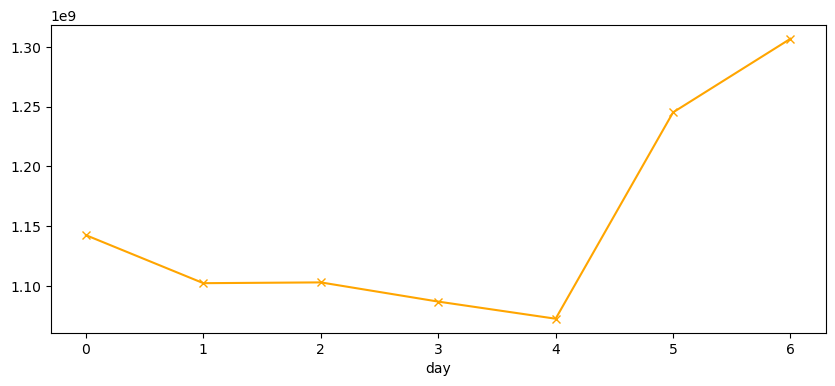

In [17]:

df_day=df.groupby('day')['sales'].sum().reset_index()
df_day.set_index('day',inplace=True)
df_day['sales'].plot(figsize=(10,4),style='-x',color='orange')
#sns.lineplot(x='day',y='sales',data=df_day,hue='holiday')



### Insights
- Sales dips around weekdays on day 1,2,3 & 4 
- Sales peak around weekends on Fridays and most on Saturdays, Sundays are also relatively good for business

<Axes: xlabel='month'>

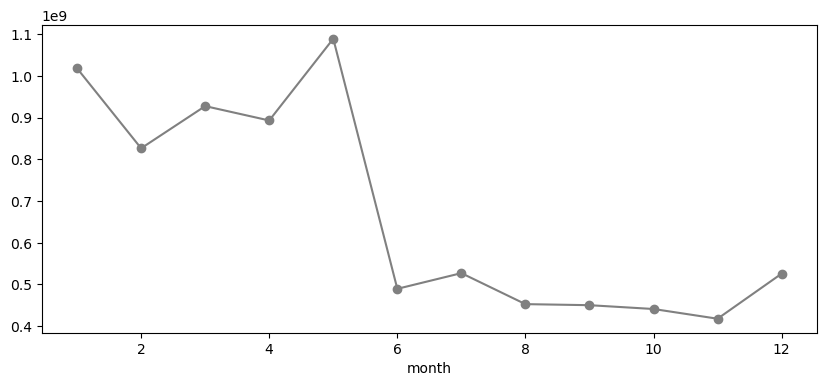

In [18]:
df['date']=pd.to_datetime(df['date'])
df_month=df.groupby('month')['sales'].sum().reset_index()
df_month.set_index('month',inplace=True)
df_month['sales'].plot(figsize=(10,4),style='-o',color='grey')
#sns.lineplot(x='month',y='sales',data=df_month,hue='holiday')


### Insights
- Sales are high for first 4 months, with sales peaking in May
- Sales dip post May and then sale are lowest in month of June showing signs of recovery towards year end

<Axes: xlabel='qtr'>

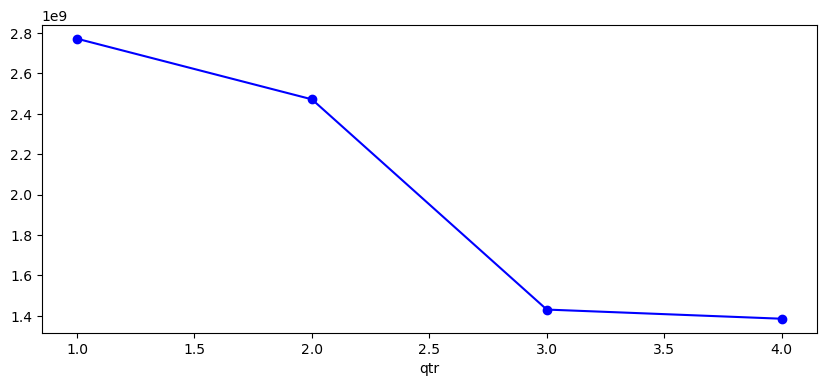

In [19]:
df_qtr=df.groupby('qtr')['sales'].sum().reset_index()
df_qtr.set_index('qtr',inplace=True)
df_qtr['sales'].plot(figsize=(10,4),style='-o',color='blue')

### Insights
- As observed earlier sales are high for first 2 quarters and then dips in second half of the year with 4th quarter giving lowest performance

## Bivariate Analysis

T-statistic:  67.99011744850168
P-value  0.0
Reject Ho
There is a statiscally significant difference in sales between holidays and non-holidays


<Axes: xlabel='sales', ylabel='Count'>

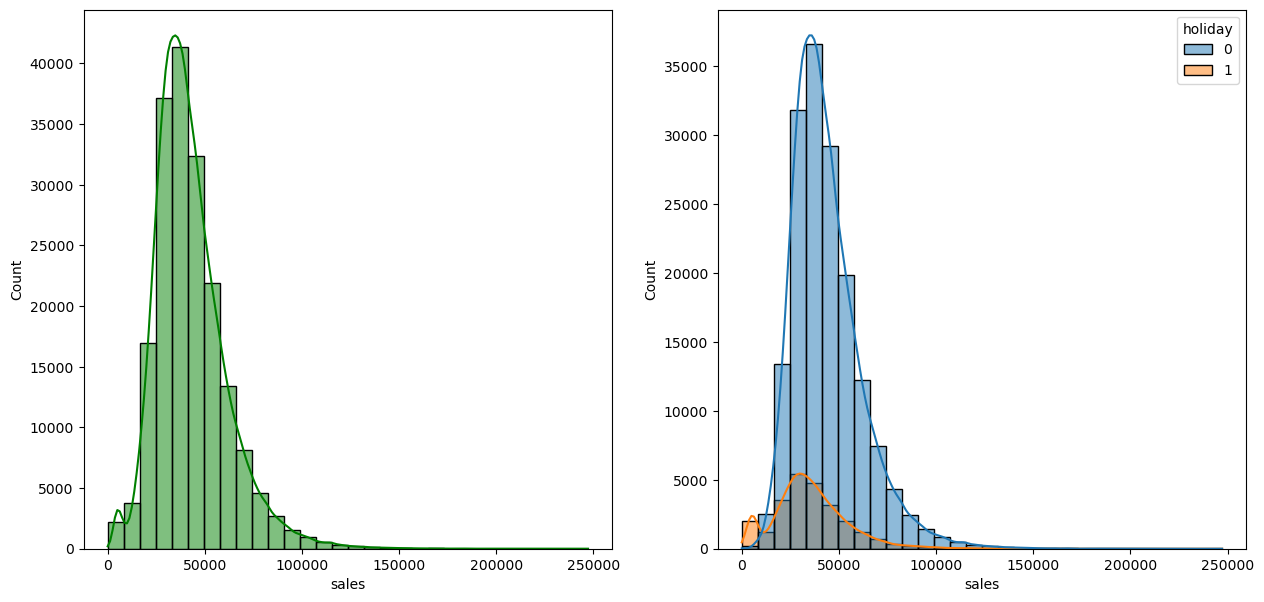

In [20]:
# Perfomring Hypothesis testing to ensure how Holidays are related to sales
#Ho:There is no difference in sales between holidays and non-holidays
#ha: There is difference in sales between holidays and non-holidays

from scipy import stats
non_holiday_sales=df[df['holiday']==0]['sales']
holiday_sales=df[df['holiday']==1]['sales']

t_stat,p_value=stats.ttest_ind(non_holiday_sales,holiday_sales)

print('T-statistic: ',t_stat)
print('P-value ',p_value)

alpha=0.05
if p_value<alpha:
    print('Reject Ho')
    print('There is a statiscally significant difference in sales between holidays and non-holidays')
else:
    print('Accept Ho')
    print('There is a statiscally no significant difference in sales between holidays and non-holidays')

fig,ax = plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x='sales',bins=30, kde=True,ax=ax[0],color='g')
sns.histplot(data=df,x='sales',bins=30,hue='holiday', kde=True,ax=ax[1])

### Insights
- Sales are generally higher on non-holidays, with a clear peak around 40,000 to 50,000 in sales.
- Holiday sales tend to be more dispersed, and a greater proportion of the sales are in the lower ranges (e.g., below 40,000).
- The long tail in both distributions indicates that, on some occasions, very high sales are possible, though they are rare.

<Axes: xlabel='qtr', ylabel='sales'>

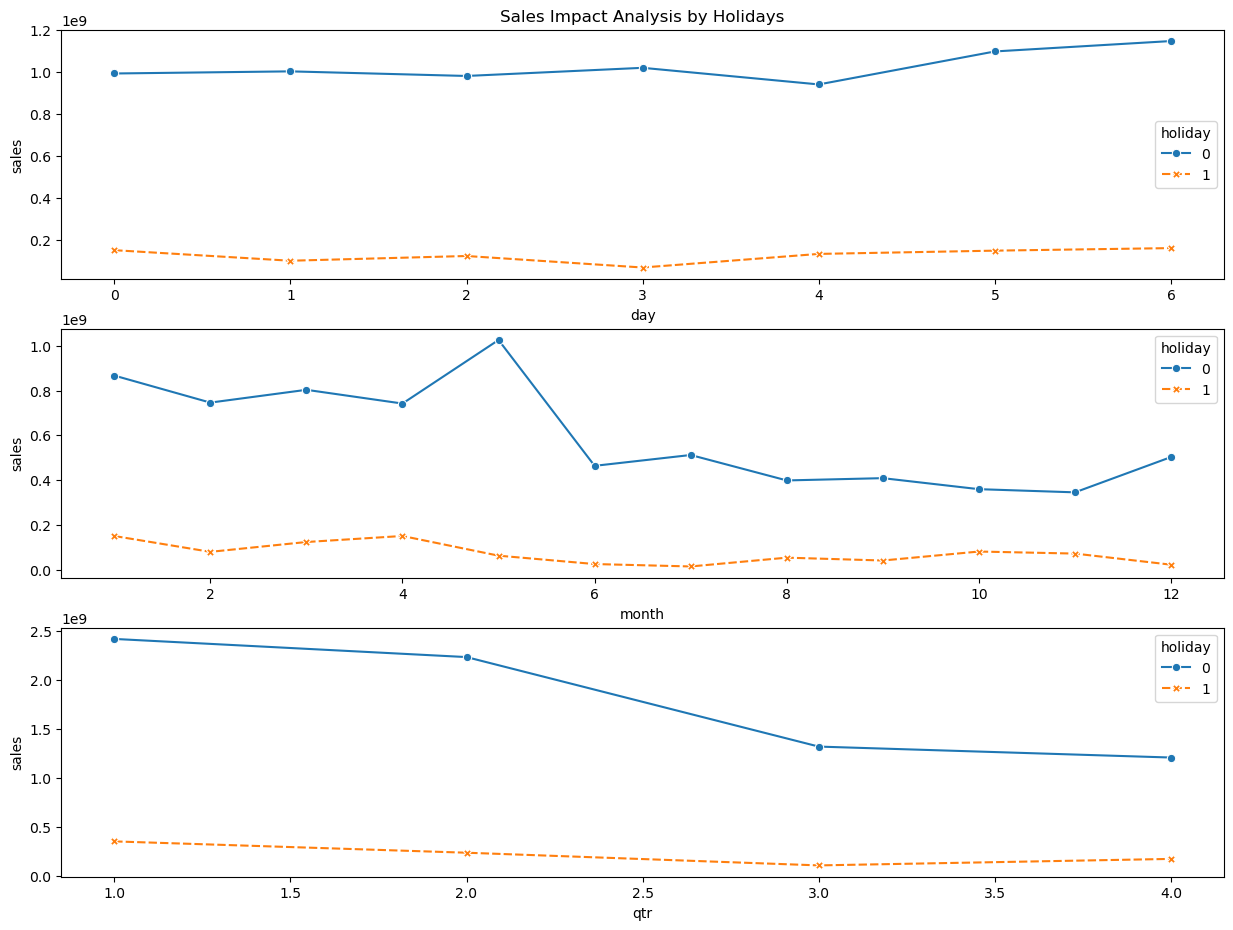

In [21]:
#Impact Analysis of Holidays
fig,ax=plt.subplots(3,1,figsize=(15,11))
df_day=df.groupby(['day','holiday'])['sales'].sum().reset_index()
df_day.set_index('day',inplace=True)
#df_day['sales'].plot(figsize=(10,4),style='-o',color='orange',hue='holiday',ax=ax[0])
sns.lineplot(x='day',y='sales',data=df_day,hue='holiday',markers=True, style='holiday', dashes=True,ax=ax[0])
ax[0].set_title('Sales Impact Analysis by Holidays')

df_month=df.groupby(['month','holiday'])['sales'].sum().reset_index()
df_month.set_index('month',inplace=True)
#df_month['sales'].plot(figsize=(10,4),style='-x',color='orange',ax=ax[1])
sns.lineplot(x='month',y='sales',data=df_month,hue='holiday',markers=True, style='holiday', dashes=True,ax=ax[1])

df_qtr=df.groupby(['qtr','holiday'])['sales'].sum().reset_index()
#df_qtr.set_index('qtr',inplace=True)
sns.lineplot(x='qtr',y='sales',data=df_qtr,hue='holiday',markers=True, style='holiday', dashes=True,ax=ax[2])



### Insights
- Holidays tend negate the seasonality we observed for day, month and qtr
- Holidays turn out to be low revenue days for the business

The following output supports the observation that sales on holidays in significantly lower than non-holiday days

### Analysing efffect of Discount on Sales

T-statistic:  148.57853541537764
P-value  0.0
Reject Ho
Discount has effect on Sales


<Axes: xlabel='sales', ylabel='Count'>

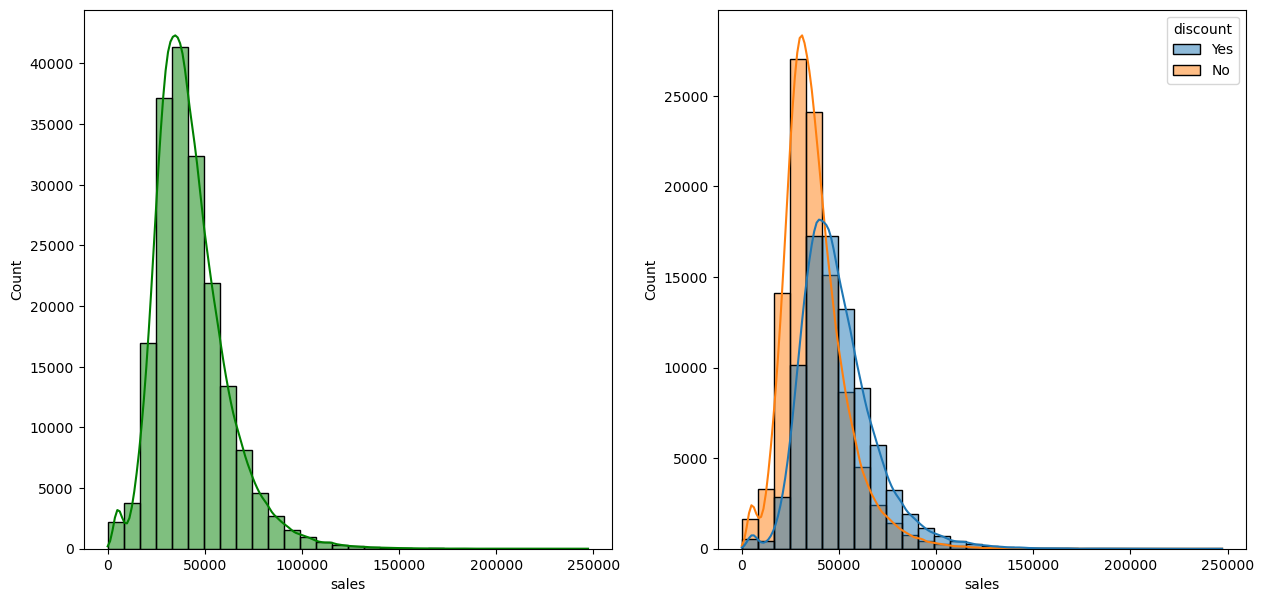

In [22]:
# Perfomring Hypothesis testing to ensure how Discounts are related to sales
#Ho:Discount has no effect on Sales
#Ha: Discount has effect on Sales

from scipy import stats
non_holiday_sales=df[df['discount']=='Yes']['sales']
holiday_sales=df[df['discount']=='No']['sales']

t_stat,p_value=stats.ttest_ind(non_holiday_sales,holiday_sales)

print('T-statistic: ',t_stat)
print('P-value ',p_value)

alpha=0.05
if p_value<alpha:
    print('Reject Ho')
    print('Discount has effect on Sales')
else:
    print('Accept Ho')
    print('Discount has no effect on Sales')


fig,ax = plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x='sales',bins=30, kde=True,ax=ax[0],color='g')
sns.histplot(data=df,x='sales',bins=30,hue='discount', kde=True,ax=ax[1])

Text(0, 0.5, '#Order')

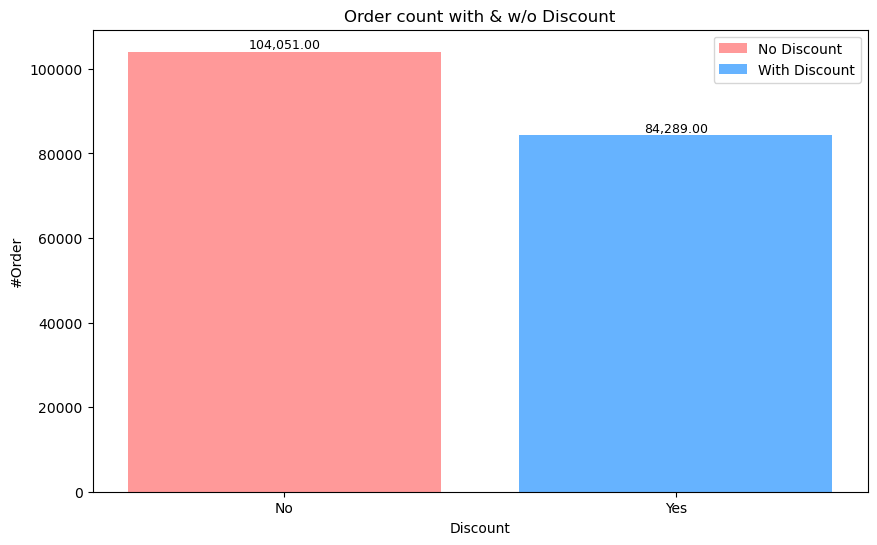

In [70]:
order_discount= df.groupby('discount')['#order'].count()
order_discount=order_discount.reset_index()


# Plotting the bar graph
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Add labels for the legend
labels = ['No Discount', 'With Discount']
colors = ['#ff9999', '#66b3ff']

# Plot with labels
bars = ax.bar(order_discount['discount'], order_discount['#order'], color=colors, label=labels)

# Add legend
ax.legend()

# Adding labels
for container in ax.containers:
    ax.bar_label(container, labels=[f'{value:,.2f}' for value in container.datavalues], color='black', size=9)

# Setting title and labels
ax.set_title('Order count with & w/o Discount')
ax.set_xlabel('Discount')
ax.set_ylabel('#Order')

Text(0, 0.5, 'Sales')

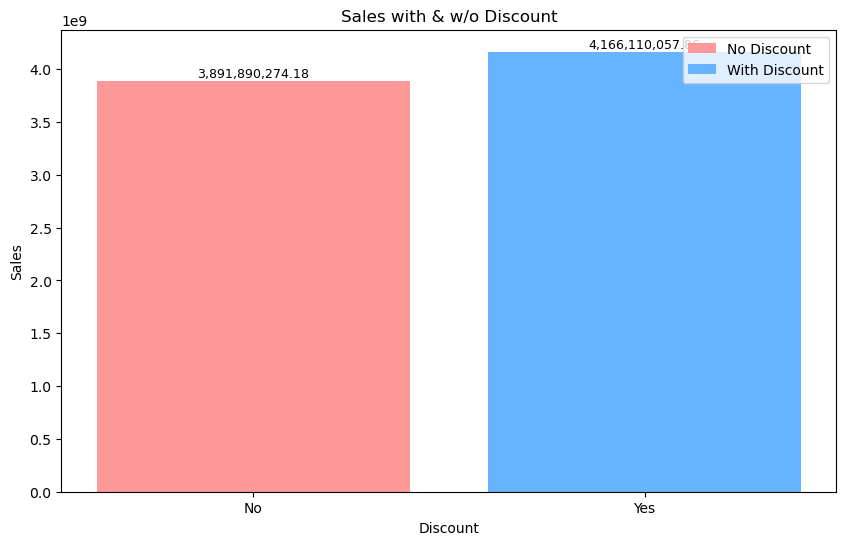

In [61]:
sales_discount= df.groupby('discount')['sales'].sum()
sales_discount = sales_discount.reset_index()



# Plotting the bar graph
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Add labels for the legend
labels = ['No Discount', 'With Discount']
colors = ['#ff9999', '#66b3ff']

# Plot with labels
bars = ax.bar(sales_discount['discount'], sales_discount['sales'], color=colors, label=labels)

# Add legend
ax.legend()

# Adding labels
for container in ax.containers:
    ax.bar_label(container, labels=[f'{value:,.2f}' for value in container.datavalues], color='black', size=9)

# Setting title and labels
ax.set_title('Sales with & w/o Discount')
ax.set_xlabel('Discount')
ax.set_ylabel('Sales')


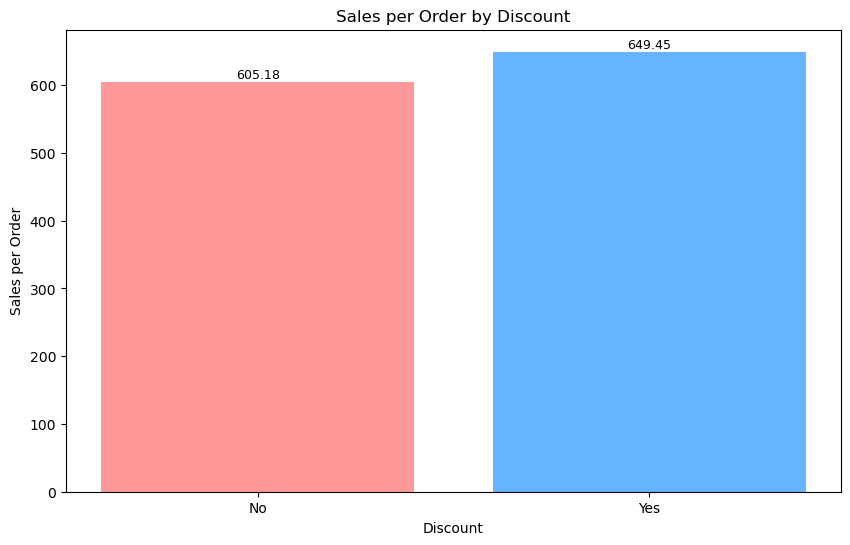

In [41]:
merged=pd.merge(sales_discount,order_discount,on='discount')
merged['sales_per_order']=merged['sales']/merged['#order']
#merged['sales_per_order'].plot(kind='bar')

# Plotting the bar graph
#ax = merged['sales_per_order'].plot(kind='bar', figsize=(10, 6))

# Plotting the bar graph
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.bar(merged.index, merged['sales_per_order'], color=['#ff9999', '#66b3ff'])

# Adding labels
for container in ax.containers:
    ax.bar_label(container, labels=[f'{value:,.2f}' for value in container.datavalues], color='black', size=9)

# Setting title and labels
ax.set_title('Sales per Order by Discount')
ax.set_xlabel('Discount')
ax.set_ylabel('Sales per Order')

plt.show();

### Insights:
- Higher Peak for No Discount: The sales without discounts peak higher at lower values
- Distribution Spread: Sales with discounts have a borader spread extending towards higher sales values.
- Right-Skewed: Both distributons skew right, with long tail towards high sales value indicating discounts could lead to higher sales value
- During discount the total orders placed is 84,289 and 104,051 without discount
- Count of orders during discount is down by 18%
- During discount the total sales is $4,166 millions and $3,891 millions without discount
- Sales is higher by 7% during discount days.
- Average value per order during discount is $649 whereas without discount it is $605
- Average value per order is higher by 7%
- This shows us that though the count of orders drop during discount but the overall sales and sales value per order increases by 7%



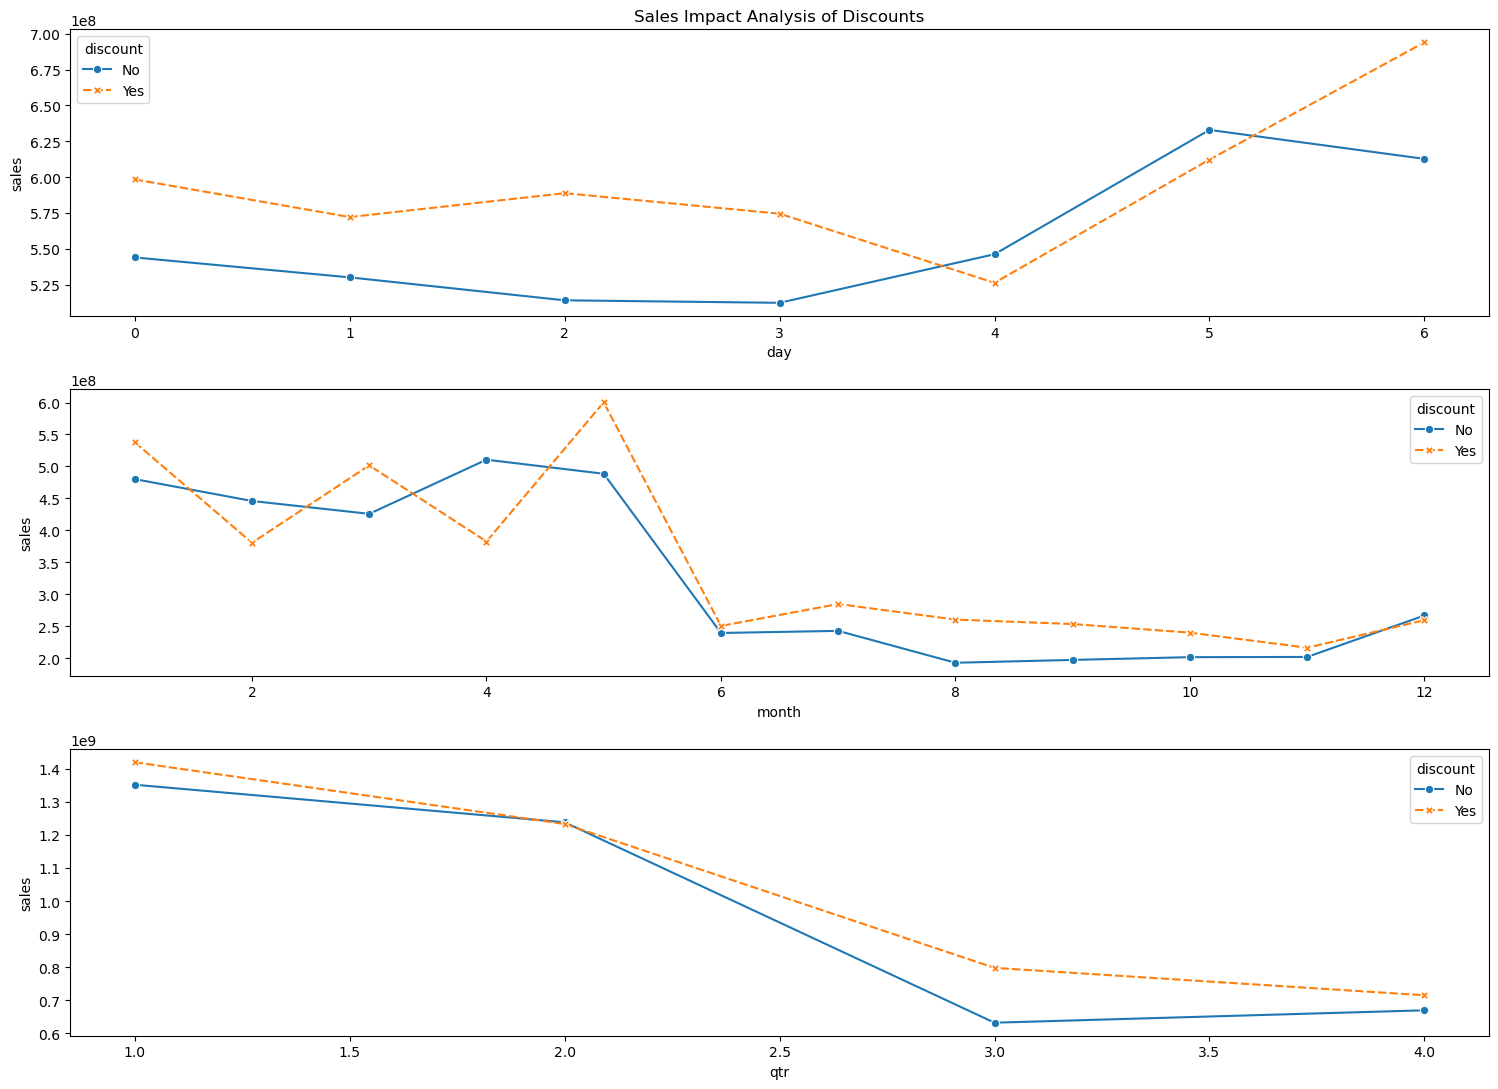

In [71]:
fig, ax = plt.subplots(3, 1, figsize=(15, 11))

# Group by 'day' and 'discount'
df_day = df.groupby(['day', 'discount'])['sales'].sum().reset_index()
df_day.set_index('day', inplace=True)
sns.lineplot(x='day', y='sales', data=df_day.reset_index(), hue='discount', markers=True, style='discount', dashes=True, ax=ax[0])
ax[0].set_title('Sales Impact Analysis of Discounts')

# Group by 'month' and 'discount'
df_month = df.groupby(['month', 'discount'])['sales'].sum().reset_index()
df_month.set_index('month', inplace=True)
sns.lineplot(x='month', y='sales', data=df_month.reset_index(), hue='discount', markers=True, style='discount', dashes=True, ax=ax[1])

# Group by 'qtr' and 'discount'
df_qtr = df.groupby(['qtr', 'discount'])['sales'].sum().reset_index()
sns.lineplot(x='qtr', y='sales', data=df_qtr, hue='discount', markers=True, style='discount', dashes=True, ax=ax[2])

# Tight layout for better spacing
plt.tight_layout()
plt.show()

### Insights:
- Discounts bring out a different buying behavior of customers
- Discounts drive the sales higher for weekdays
- For month and qtr level sales, discounts tend to pull the sales figure higher

### Recommendations
- Comparitively discounts have a broader effect on customers as compared to holidays
- Discounts improve the weekday overall sales performance
- In times of distress during quarters and months with lower turnaround of customers, discounts help drive the business better
- Discounts should we used wisely after through analytics of the sales movement to drive the business to perform better
- Caution should be excercised tounderstand seasonality and offer discounts accordingly
- Over discounting may lead to dip in brand perception

In [24]:
df.columns

Index(['id', 'store_id', 'store_type', 'location_type', 'region_code', 'date',
       'holiday', 'discount', '#order', 'sales', 'day', 'month', 'qtr'],
      dtype='object')

F-statistic:  35123.64411601774
P-value:  0.0
Reject Ho
At least one store type has a different mean sales compared to the others


<Axes: xlabel='sales', ylabel='Count'>

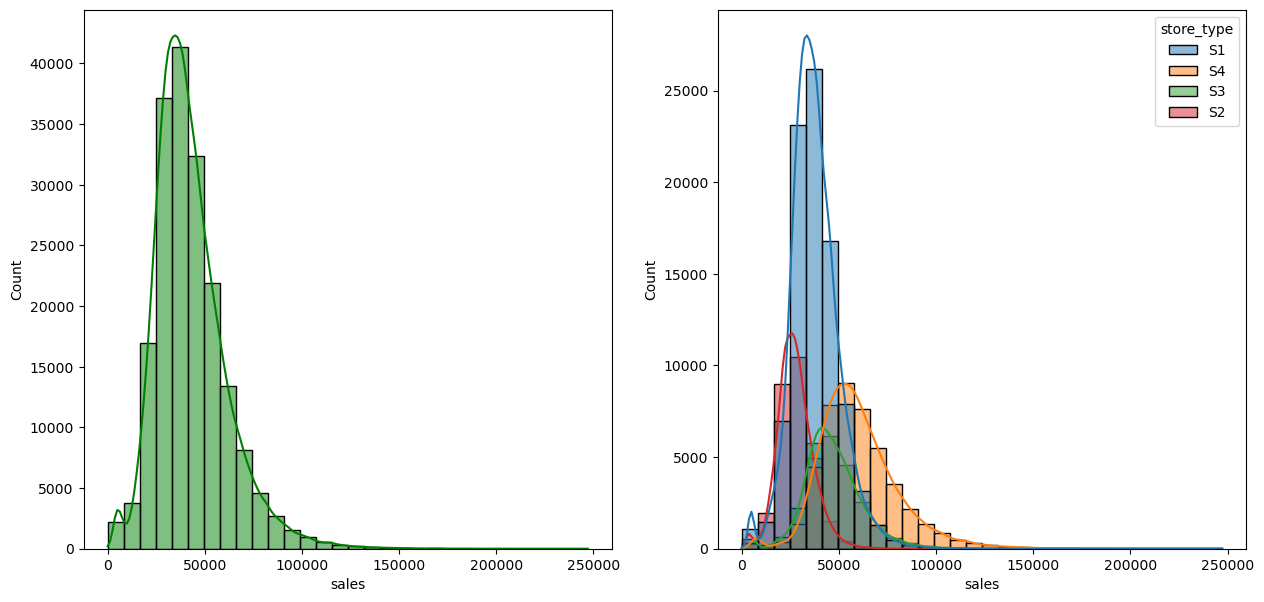

In [72]:
#performing ANOVA to compare the means across various store types
# Splitting data into groups based on store type
s1_sales = df[df['store_type'] == 'S1']['sales']
s2_sales = df[df['store_type'] == 'S2']['sales']
s3_sales = df[df['store_type'] == 'S3']['sales']
s4_sales = df[df['store_type'] == 'S4']['sales']

# Performing ANOVA
f_stat, p_value = stats.f_oneway(s1_sales, s2_sales, s3_sales,s4_sales)

print("F-statistic: ", f_stat)
print("P-value: ",p_value)

#(H0): The mean sales are equal across all store types.

#(Ha): At least one store type has a different mean sales compared to the others.

alpha=0.05
if p_value<alpha:
    print('Reject Ho')
    print('At least one store type has a different mean sales compared to the others')
else:
    print('Accept Ho')
    print('The mean sales are equal across all store types')


fig,ax = plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x='sales',bins=30, kde=True,ax=ax[0],color='g')
sns.histplot(data=df,x='sales',bins=30,hue='store_type', kde=True,ax=ax[1])

### Insights
- Among the various store types S1 makes the most volume by sales which has narrower band for sales values between 3000 and 6000
- S3 among all the stores has the minimum sales volume that is uniformly distributed
- Store S4 has the widest spread among the store types, indicating high value sales with lower volumes
- Stores are more likely bifurcated focussing either on volume or sales-value which have more likely an inverse relation with each other

F-stat 25338.873708475992
P-value 0.0
Reject Ho
At least one location type has a different mean sales compared to the others


<Axes: xlabel='sales', ylabel='Count'>

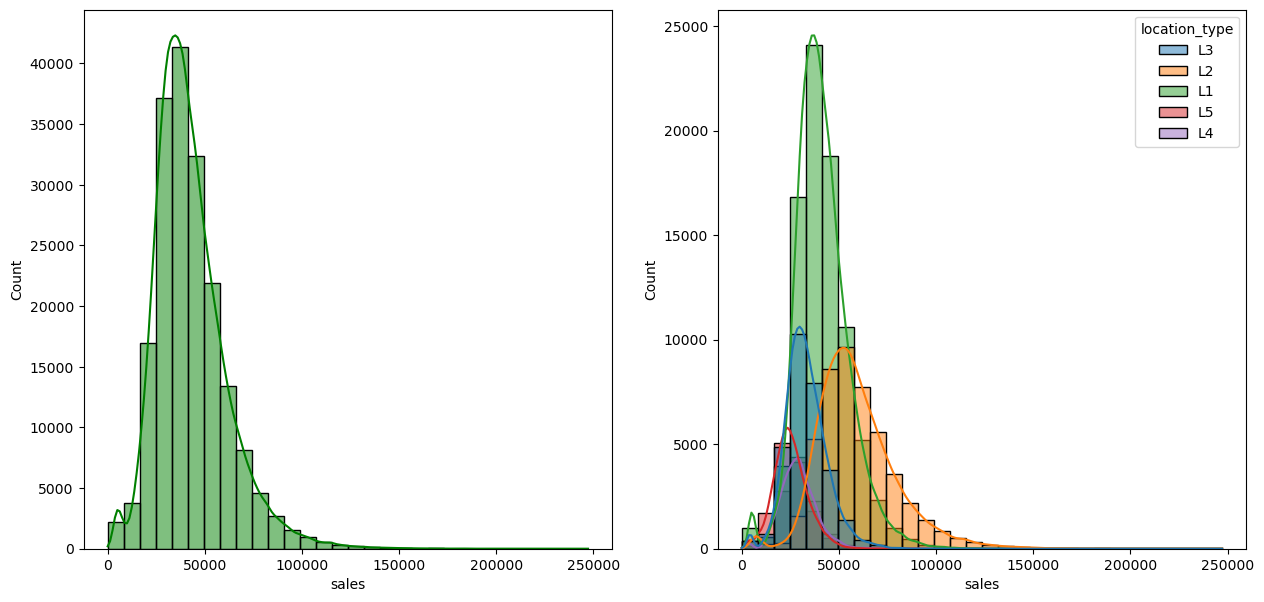

In [73]:
#performing ANOVA to compare mean across region types
#separating the data based on region
L1_sales = df[df['location_type']=='L1']['sales']
L2_sales = df[df['location_type']=='L2']['sales']
L3_sales = df[df['location_type']=='L3']['sales']
L4_sales = df[df['location_type']=='L4']['sales']
L5_sales = df[df['location_type']=='L5']['sales']

#performing ANOVA
f_stat,p_value=stats.f_oneway(L1_sales,L2_sales,L3_sales,L4_sales,L5_sales)
print('F-stat',f_stat)
print('P-value',p_value)

#(H0): The mean sales are equal across all locations.

#(Ha): At least one location has a different mean sales compared to the others.

alpha=0.05
if p_value<alpha:
    print('Reject Ho')
    print('At least one location type has a different mean sales compared to the others')
else:
    print('Accept Ho')
    print('The mean sales are equal across all locations')



fig,ax = plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x='sales',bins=30, kde=True,ax=ax[0],color='g')
sns.histplot(data=df,x='sales',bins=30,hue='location_type', kde=True,ax=ax[1])


### Insights
- Among the various location types L1 makes the most volume by sales which has narrower band for sales values between 3000 and 6000
- L2 has a broader spread indicating lower sales by volume but higher sales by value
- L3 has a similar sales by volume as L2 but for lower ranged products
- L4 and L5 have similar sales performance with major sales happening for lower end products
- Among the various location types, L1 sales the most by volume, L2 sales the most by sales value
- The stores have been divided in such a way that either they focus on high-volume with low-sales value or low-volume high-sales value

F-stat 1682.4255287950677
P-value 0.0
Reject Ho
At least one region type has a different mean sales compared to the others


<Axes: xlabel='sales', ylabel='Count'>

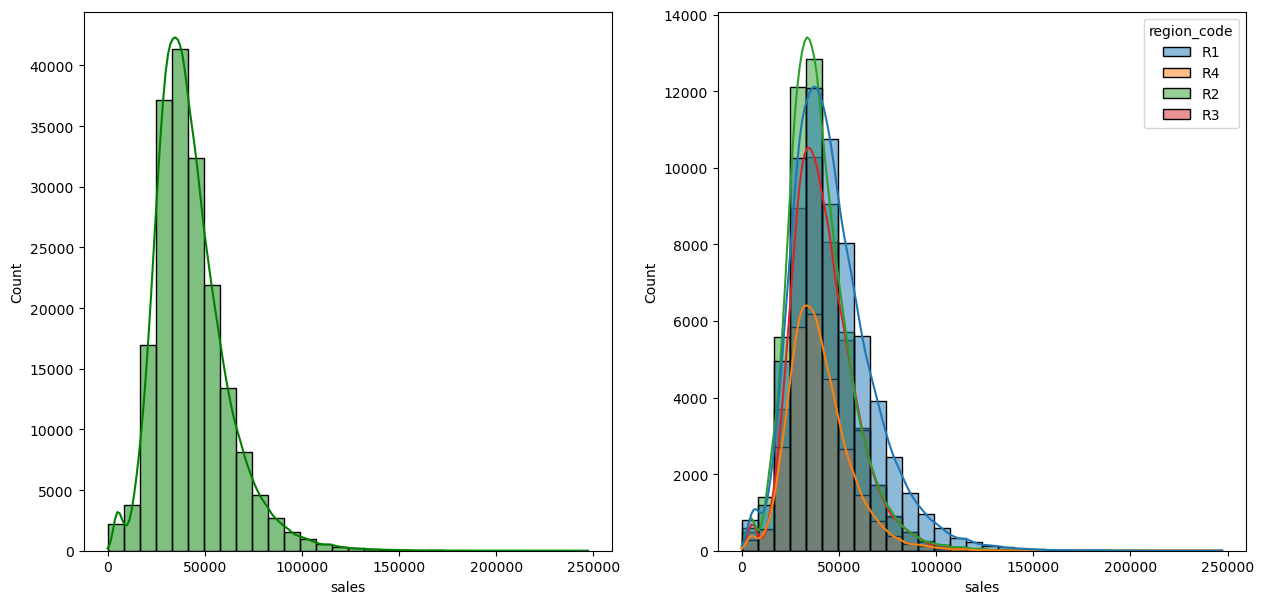

In [74]:
#performing ANOVA to compare mean across region types
#separating the data based on region
R1_sales = df[df['region_code']=='R1']['sales']
R2_sales = df[df['region_code']=='R2']['sales']
R3_sales = df[df['region_code']=='R3']['sales']
R4_sales = df[df['region_code']=='R4']['sales']

#performing ANOVA
f_stat,p_value=stats.f_oneway(R1_sales,R2_sales,R3_sales,R4_sales)
print('F-stat',f_stat)
print('P-value',p_value)

#(H0): The mean sales are equal across all regions.

#(Ha): At least one region has a different mean sales compared to the others.

alpha=0.05
if p_value<alpha:
    print('Reject Ho')
    print('At least one region type has a different mean sales compared to the others')
else:
    print('Accept Ho')
    print('The mean sales are equal across all regions')



fig,ax = plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x='sales',bins=30, kde=True,ax=ax[0],color='g')
sns.histplot(data=df,x='sales',bins=30,hue='region_code', kde=True,ax=ax[1])

### Insights

#### 1.)Regional Performance:

R1 and R2: These regions show relatively higher peaks, indicating more frequent sales at certain lower values. This suggests a steady and possibly higher volume of transactions.

R3 and R4: While also displaying sales, the peaks are slightly less pronounced, suggesting less frequent transactions compared to R1 and R2.

#### 2.)Sales Spread:

R1 and R2: These regions have a narrower spread around their peaks, indicating more concentrated sales values.

R3 and R4: Display a broader spread, indicating greater variability in sales amounts. This could point to a mix of low and high sales values, suggesting a more diverse market or customer base.

#### 3.)Potential Strategies:

R1 and R2: Given their frequent sales, strategies to maintain and slightly boost these transactions could include targeted promotions or loyalty programs.

R3 and R4: For these regions, focusing on high-value sales, premium products, or special discounts might help capitalize on the variability in sales amounts.

## Multivariate Analysis

### Multivariate Analysis of Sales over the period of time

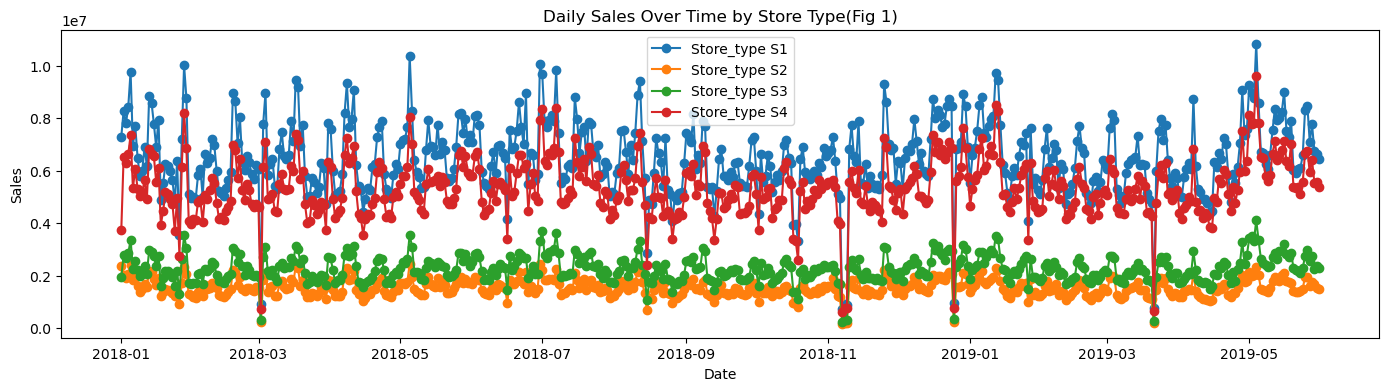

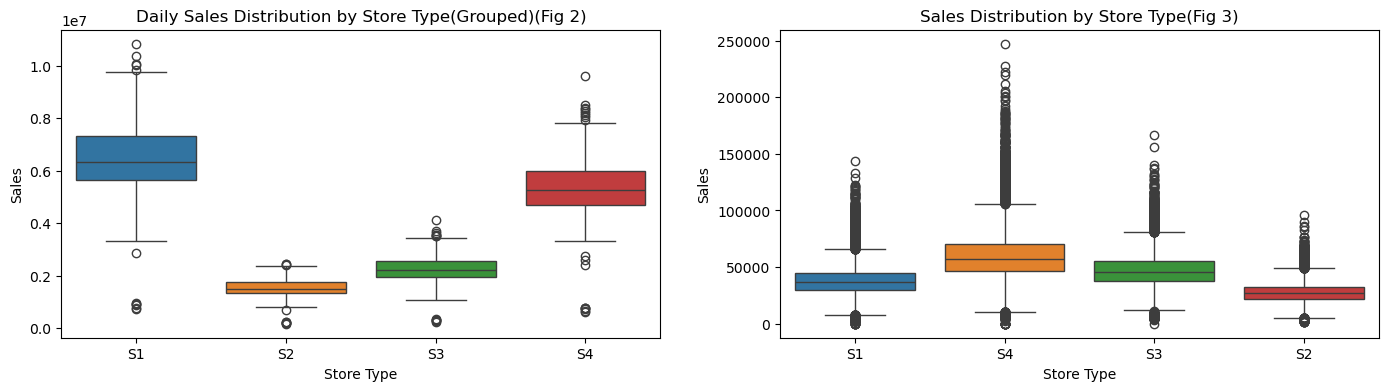

In [75]:
# Group by 'date' and 'store_type', and then sum the sales
grouped3 = df.groupby(['date', 'store_type']).sum().reset_index()

# Line Chart Plot
fig1, ax1 = plt.subplots(figsize=(17,4))  # Set size for line chart
for store in grouped3['store_type'].unique():
    df_store = grouped3[grouped3['store_type'] == store]
    ax1.plot(df_store['date'], df_store['sales'], marker='o', label=f'Store_type {store}')
ax1.set_title('Daily Sales Over Time by Store Type(Fig 1)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales')
ax1.legend()

# Box Plot
fig2, ax2 = plt.subplots(1,2,figsize=(17,4))  # Set size for box plot
sns.boxplot(data=grouped3, x='store_type', y='sales', hue='store_type', ax=ax2[0])
ax2[0].set_title('Daily Sales Distribution by Store Type(Grouped)(Fig 2)')
ax2[0].set_xlabel('Store Type')
ax2[0].set_ylabel('Sales')

sns.boxplot(data=df,x='store_type',y='sales',hue='store_type',ax=ax2[1])
ax2[1].set_title('Sales Distribution by Store Type(Fig 3)')
ax2[1].set_xlabel('Store Type')
ax2[1].set_ylabel('Sales')

# Display the Plots
plt.show()


### Insights
- If we compare the aggregated daily sales by store types, (Fig 1) & (Fig 2), we will notice that store S1 outperforms other stores
- The median sales for S1 is approx. 62k followed by S4 which is around 57k
- Without aggregating the data on daily basis, we notice S4 shows more outliers as it calcualtes individual transactions and also has a higher median than S1
- S1 makes the highest daily average whereas S4 with a higher median shows highest average transaction value

### Recommendations
- Leverage S1’s Consistency: Since S1 has the highest daily average, it indicates a strong and steady stream of customers. 
Focus on maintaining and enhancing customer loyalty here. Implement customer retention programs, loyalty rewards, and exclusive offers to keep this trend up. 
S1 could also be used as a benchmark to uplift performance in other store types.

- Maximize S4’s High-Value Transactions: S4 shows higher median transactions, indicating it's attracting fewer, but higher-spending customers.
 Introduce premium products or services here. Maybe consider high-end, personalized customer experiences or tailored marketing campaigns to further capitalize on these high-value transactions.
 Evaluate if there's potential to convert some of these high spenders into regular customers.

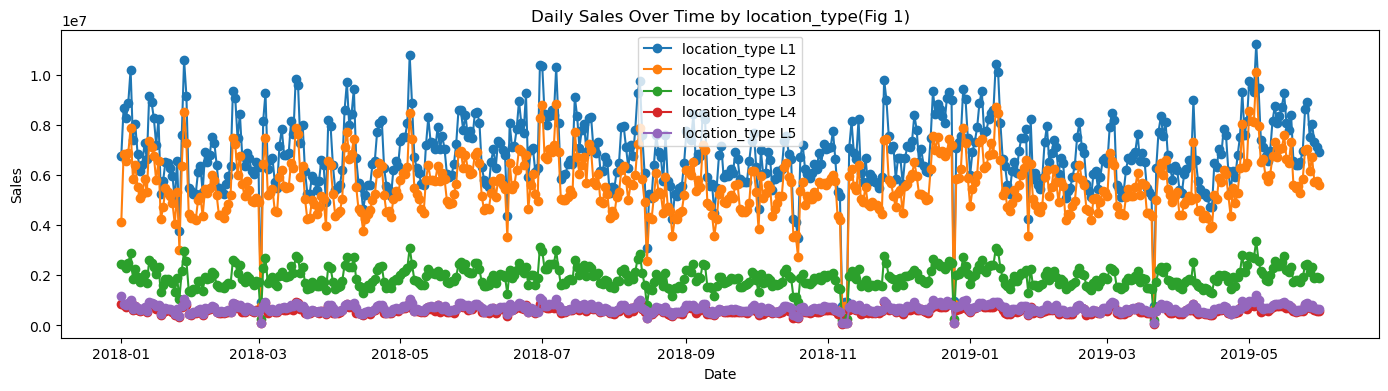

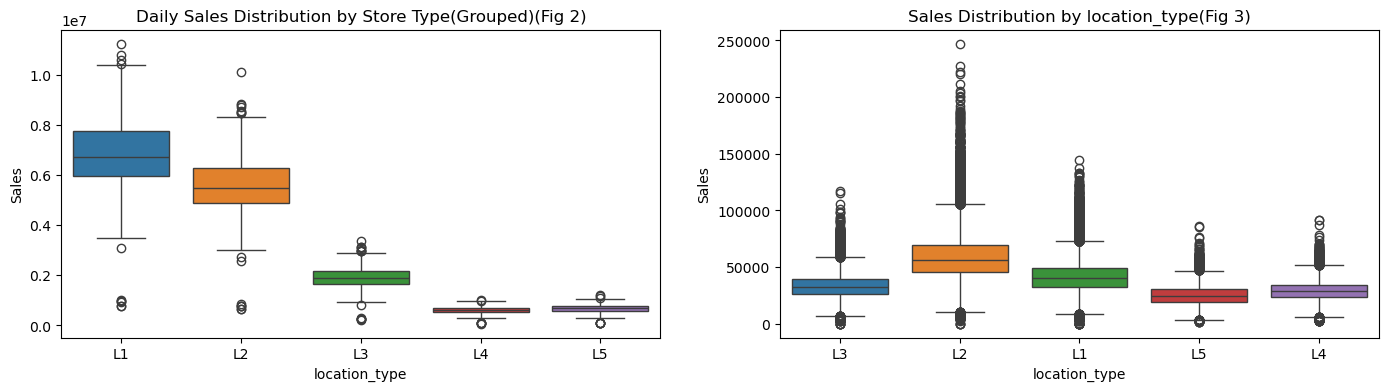

In [76]:

# Group by 'date' and 'location_type', and then sum the sales
grouped3 = df.groupby(['date', 'location_type']).sum().reset_index()

# Line Chart Plot
fig1, ax1 = plt.subplots(figsize=(17,4))  # Set size for line chart
for loc in grouped3['location_type'].unique():
    df_loc = grouped3[grouped3['location_type'] == loc]
    ax1.plot(df_loc['date'], df_loc['sales'], marker='o', label=f'location_type {loc}')
ax1.set_title('Daily Sales Over Time by location_type(Fig 1)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales')
ax1.legend()

# Box Plot
fig2, ax2 = plt.subplots(1,2,figsize=(17, 4))  # Set size for box plot
sns.boxplot(data=grouped3, x='location_type', y='sales', hue='location_type', ax=ax2[0])
ax2[0].set_title('Daily Sales Distribution by Store Type(Grouped)(Fig 2)')
ax2[0].set_xlabel('location_type')
ax2[0].set_ylabel('Sales')

sns.boxplot(data=df,x='location_type',y='sales',hue='location_type',ax=ax2[1])
ax2[1].set_title('Sales Distribution by location_type(Fig 3)')
ax2[1].set_xlabel('location_type')
ax2[1].set_ylabel('Sales')

# Display the Plots
plt.show()


### Insights
- If we compare the aggregated daily sales by store types, (Fig 1) & (Fig 2), we will notice that Location type L1 and L2 outperform every otehr location
- Comparing the sales on daily basis as well (Fig 2), we notice that sales of L1 and L2 are still at par with each other and lead the other locations by a good margin
- The median sales for L1 is approx. 68k followed by L2 which is around 57k
- Without aggregating the data(Fig 3) on daily basis, we notice L2 shows more outliers as it calcualtes individual transactions and also has a higher median than L1 i.e >50000
- Fig 3 provides a general overview of the sales distribution for L2 without considering time-related factors.
- We see a variation between top performers between Fig.2 and Fig.3 because Fig.3 ignores any seasonality and Fig.2 considers the daily performance implying L2 is more prone to seasonalities 

### Recommendations
- Monitor Performance: Both L1 and L2 should continue to monitor their sales performance over time to identify trends and areas for improvement.
- Leverage Data Analytics: Using data analytics tools, businesses can gain deeper insights into their sales data, identify patterns, and make data-driven decisions.
- Customer Satisfaction: Focusing on customer satisfaction can be a key driver of sales growth. Businesses should strive to provide excellent customer service and address any issues promptly.

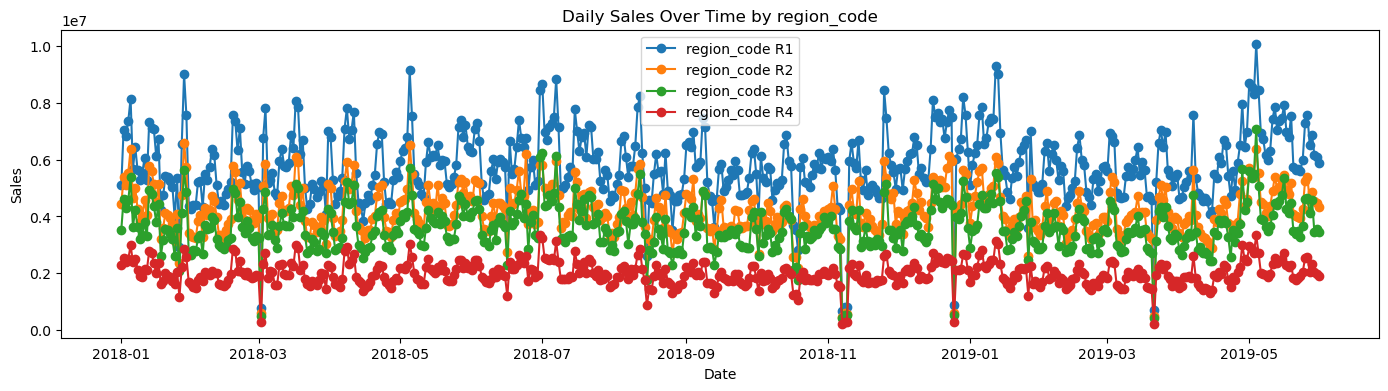

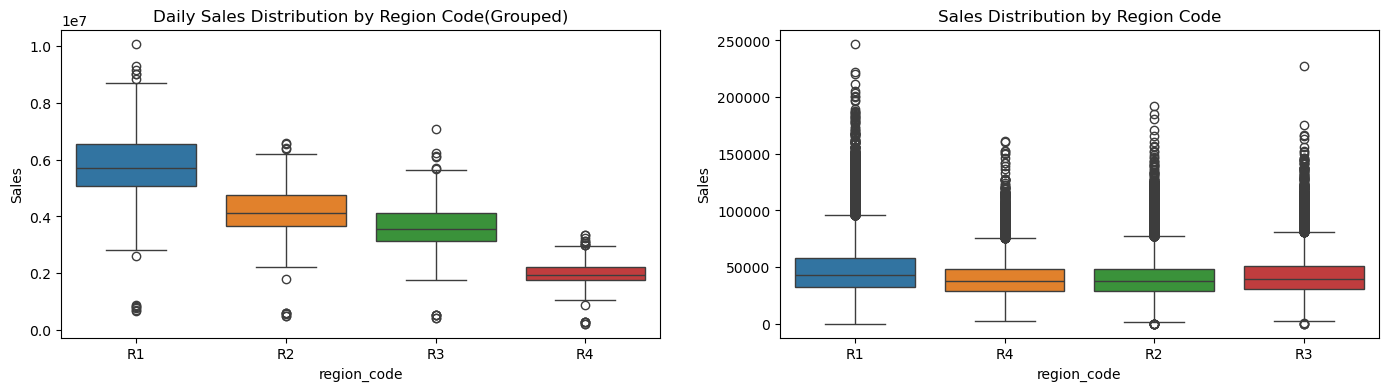

In [77]:

# Group by 'date' and 'region_code', and then sum the sales
grouped3 = df.groupby(['date', 'region_code']).sum().reset_index()

# Line Chart Plot
fig1, ax1 = plt.subplots(figsize=(17, 4))  # Set size for line chart
for region in grouped3['region_code'].unique():
    df_region = grouped3[grouped3['region_code'] == region]
    ax1.plot(df_region['date'], df_region['sales'], marker='o', label=f'region_code {region}')
ax1.set_title('Daily Sales Over Time by region_code')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales')
ax1.legend()

# Box Plot
fig2, ax2 = plt.subplots(1,2,figsize=(17, 4))  # Set size for box plot
sns.boxplot(data=grouped3, x='region_code', y='sales', hue='region_code', ax=ax2[0])
ax2[0].set_title('Daily Sales Distribution by Region Code(Grouped)')
ax2[0].set_xlabel('region_code')
ax2[0].set_ylabel('Sales')

sns.boxplot(data=df,x='region_code',y='sales',hue='region_code',ax=ax2[1])
ax2[1].set_title('Sales Distribution by Region Code')
ax2[1].set_xlabel('region_code')
ax2[1].set_ylabel('Sales')

# Display the Plots
plt.show()


### Insights
- Region wise analysis shows us a more consistent performance across the regions
- R1 is the top performer among the regions followed by R2/R3
- R1 has some extreme outliers, close to 1 million showing that not only the region is the cash cow for the business but also has potential for higher value sales


### Distribution of Sales w.r.t. Order count

Text(0.5, 1.0, 'Store Type S4')

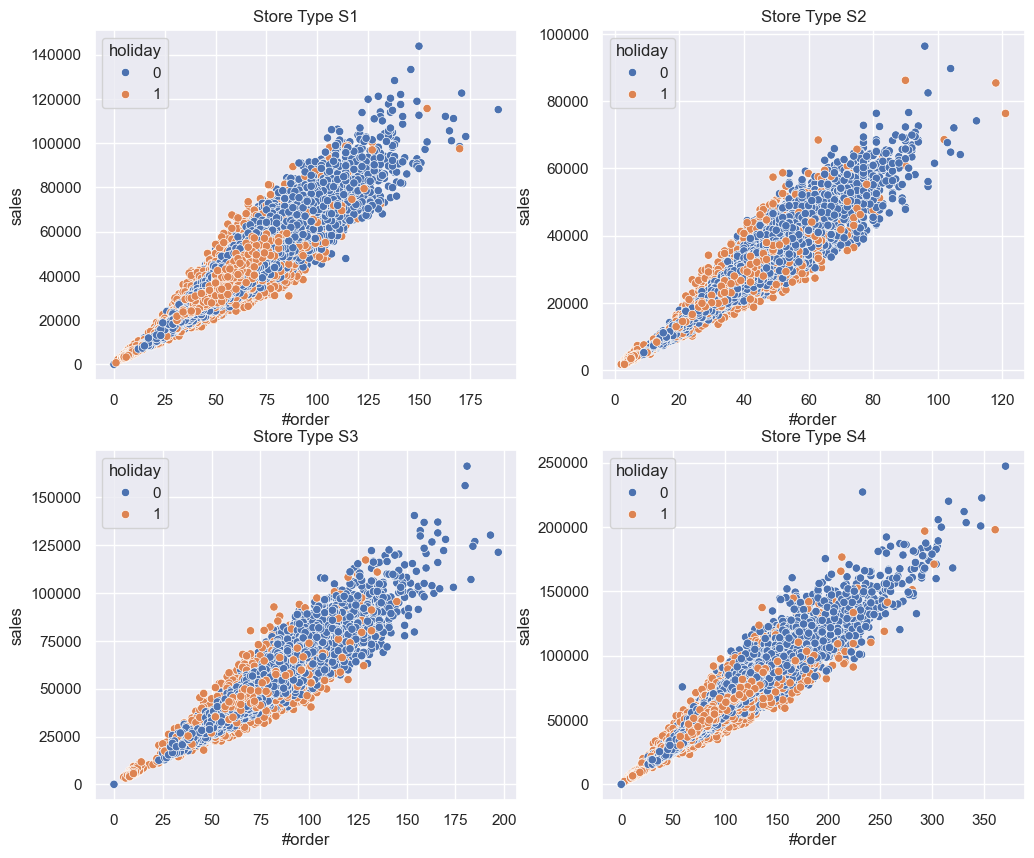

In [78]:
sns.set_theme(style="darkgrid")

fig,ax=plt.subplots(2,2,figsize=(12,10))
sns.scatterplot(data=df[df['store_type']=='S1'],x='#order',y='sales',hue='holiday',ax=ax[0,0])
ax[0, 0].set_title('Store Type S1')
sns.scatterplot(data=df[df['store_type']=='S2'],x='#order',y='sales',hue='holiday',ax=ax[0,1])
ax[0, 1].set_title('Store Type S2')
sns.scatterplot(data=df[df['store_type']=='S3'],x='#order',y='sales',hue='holiday',ax=ax[1,0])
ax[1,0].set_title('Store Type S3')
sns.scatterplot(data=df[df['store_type']=='S4'],x='#order',y='sales',hue='holiday',ax=ax[1,1])
ax[1, 1].set_title('Store Type S4')



Text(0.5, 1.0, 'Location Type L5')

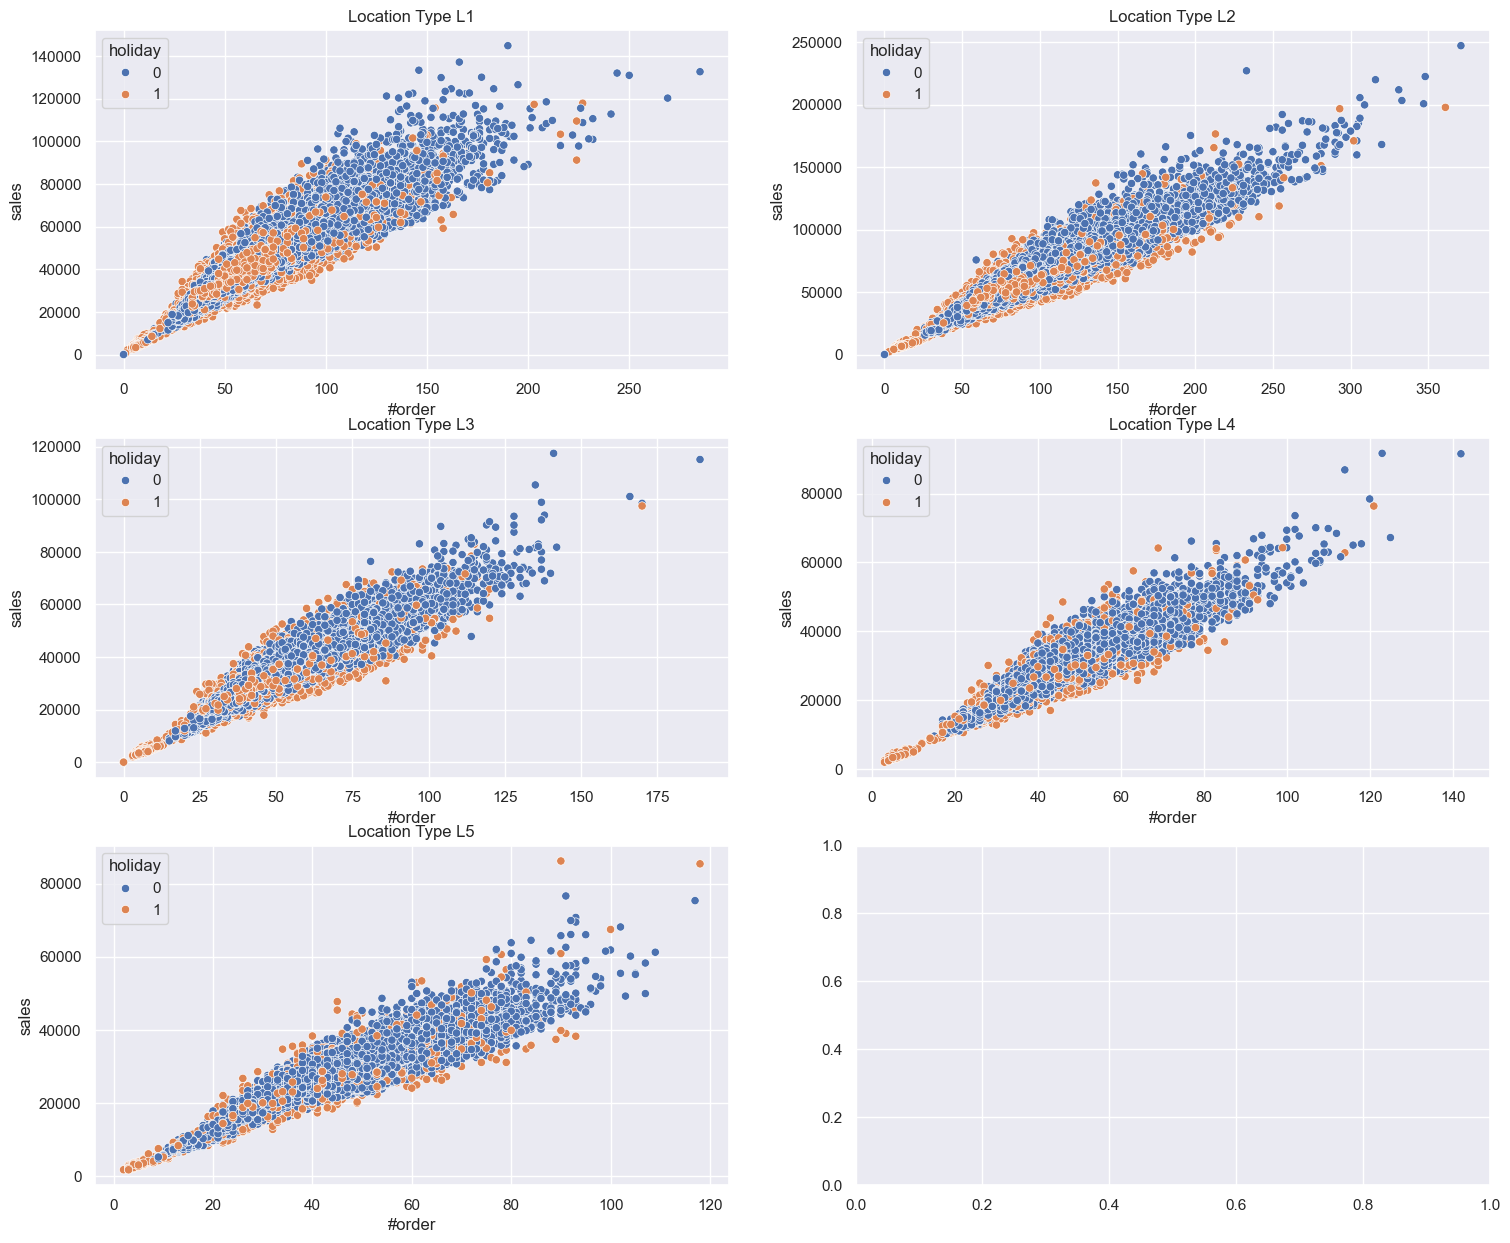

In [79]:
sns.set_theme(style="darkgrid")

fig,ax=plt.subplots(3,2,figsize=(18,15))
sns.scatterplot(data=df[df['location_type']=='L1'],x='#order',y='sales',hue='holiday',ax=ax[0,0])
ax[0, 0].set_title('Location Type L1')
sns.scatterplot(data=df[df['location_type']=='L2'],x='#order',y='sales',hue='holiday',ax=ax[0,1])
ax[0, 1].set_title('Location Type L2')
sns.scatterplot(data=df[df['location_type']=='L3'],x='#order',y='sales',hue='holiday',ax=ax[1,0])
ax[1,0].set_title('Location Type L3')
sns.scatterplot(data=df[df['location_type']=='L4'],x='#order',y='sales',hue='holiday',ax=ax[1,1])
ax[1, 1].set_title('Location Type L4')
sns.scatterplot(data=df[df['location_type']=='L5'],x='#order',y='sales',hue='holiday',ax=ax[2,0])
ax[2, 0].set_title('Location Type L5')

Text(0.5, 1.0, 'Region Code R4')

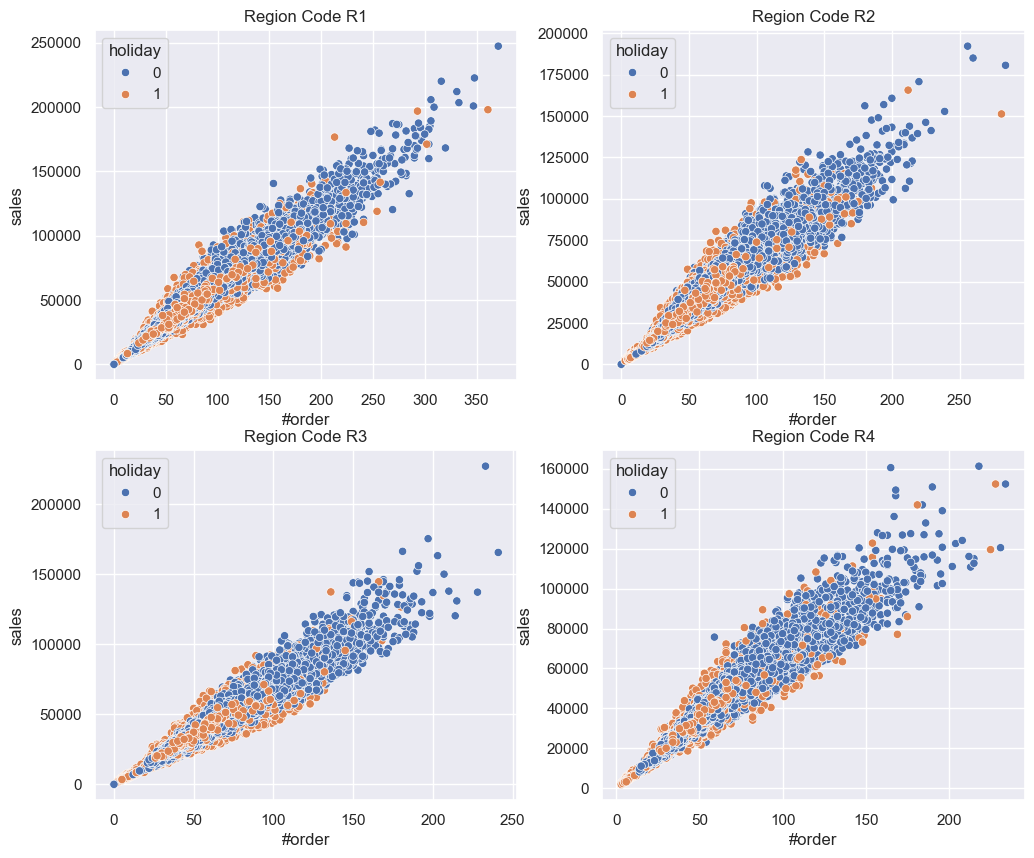

In [33]:
sns.set_theme(style="darkgrid")

fig,ax=plt.subplots(2,2,figsize=(12,10))
sns.scatterplot(data=df[df['region_code']=='R1'],x='#order',y='sales',hue='holiday',ax=ax[0,0])
ax[0, 0].set_title('Region Code R1')
sns.scatterplot(data=df[df['region_code']=='R2'],x='#order',y='sales',hue='holiday',ax=ax[0,1])
ax[0, 1].set_title('Region Code R2')
sns.scatterplot(data=df[df['region_code']=='R3'],x='#order',y='sales',hue='holiday',ax=ax[1,0])
ax[1,0].set_title('Region Code R3')
sns.scatterplot(data=df[df['region_code']=='R4'],x='#order',y='sales',hue='holiday',ax=ax[1,1])
ax[1, 1].set_title('Region Code R4')

In [80]:
from scipy.stats import pearsonr
correlation,p_value=pearsonr(df['#order'],df['sales'])


# Hypotheses
H0 = "There is no linear relationship between order and sales."
H1 = "There is a linear relationship between order and sales."

alpha = 0.05

# Decision
if p_value < alpha:
    print(f"Reject the null hypothesis (H0). Conclusion: {H1}")
else:
    print(f"Fail to reject the null hypothesis (H0). Conclusion: {H0}")

print(f'Pearson Correlation Coefficient: {correlation}')
print(f'P-value: {p_value}')

Reject the null hypothesis (H0). Conclusion: There is a linear relationship between order and sales.
Pearson Correlation Coefficient: 0.941600564612576
P-value: 0.0


### Insights
- We can observe a positive correlation between #order and sales on multiple levels viz. store, location and region
- During holidays, the count of orders and sales is on the lower side with some outliers 
- Person Correlation test establishes our observation that there is linear relationship between sales and orders 

Text(0.5, 1.0, 'Location Type L5')

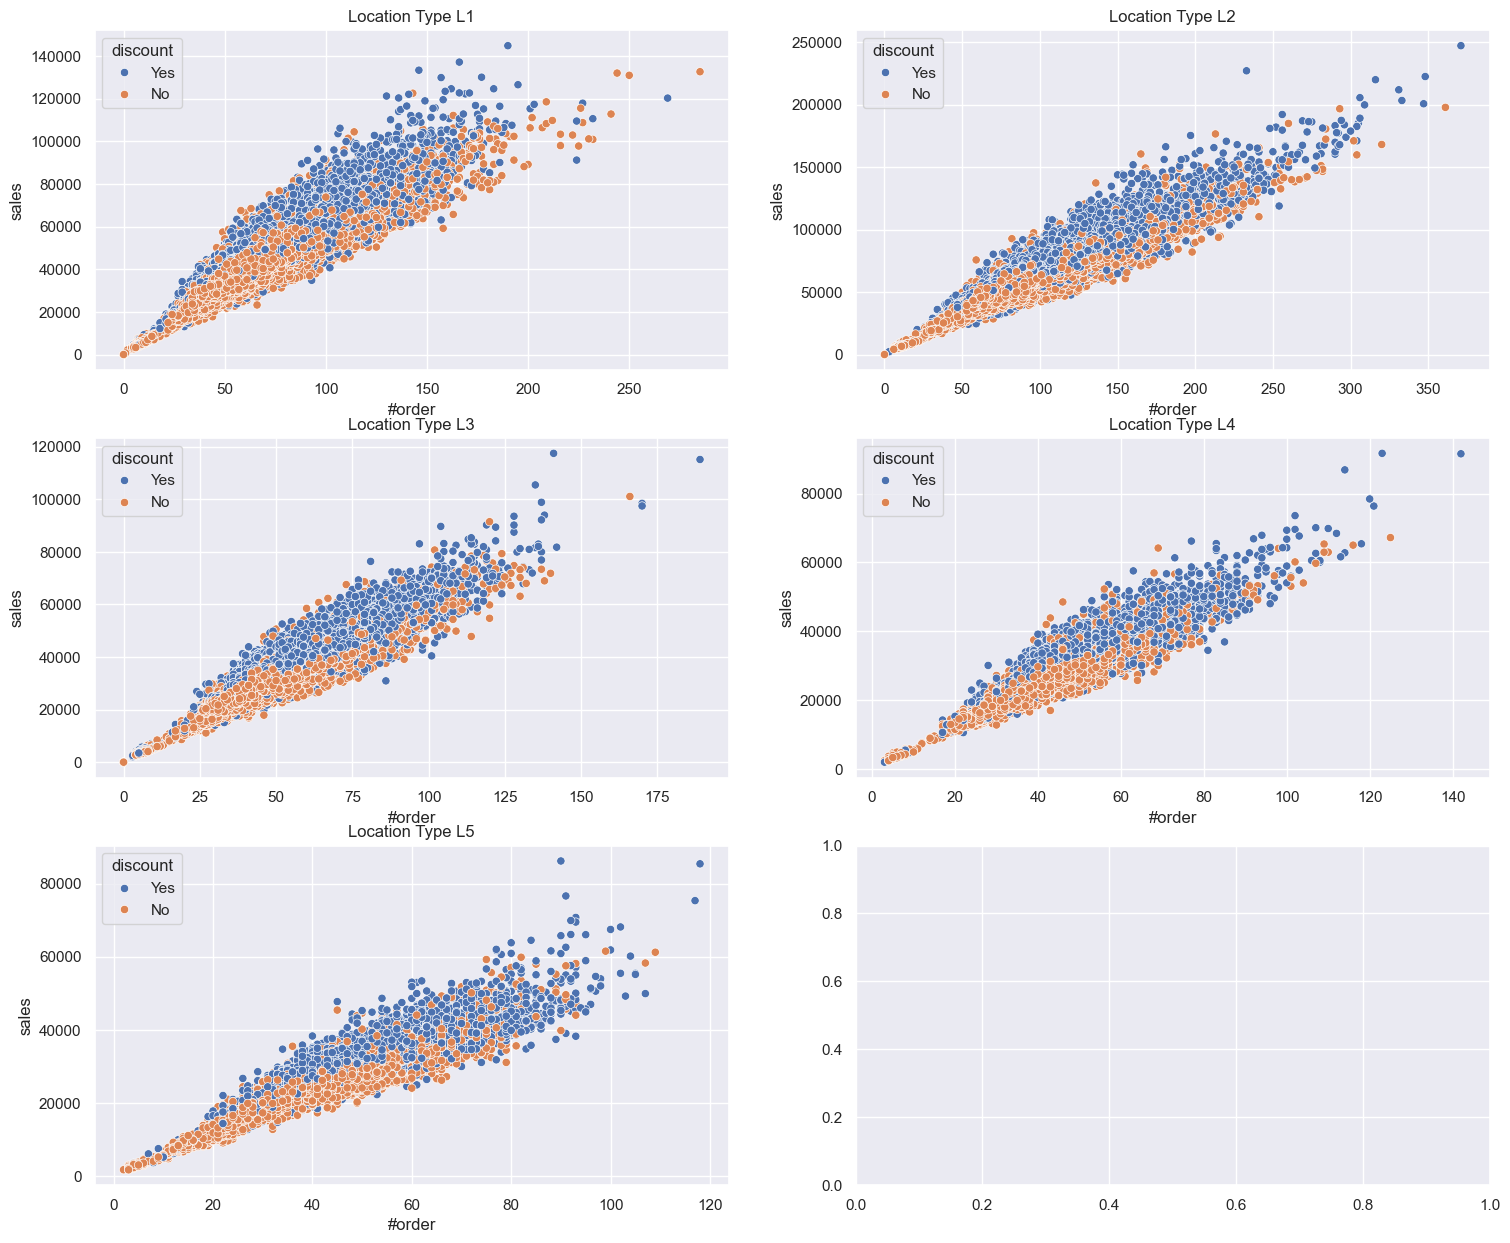

In [81]:
sns.set_theme(style="darkgrid")

fig,ax=plt.subplots(3,2,figsize=(18,15))
sns.scatterplot(data=df[df['location_type']=='L1'],x='#order',y='sales',hue='discount',ax=ax[0,0])
ax[0, 0].set_title('Location Type L1')
sns.scatterplot(data=df[df['location_type']=='L2'],x='#order',y='sales',hue='discount',ax=ax[0,1])
ax[0, 1].set_title('Location Type L2')
sns.scatterplot(data=df[df['location_type']=='L3'],x='#order',y='sales',hue='discount',ax=ax[1,0])
ax[1,0].set_title('Location Type L3')
sns.scatterplot(data=df[df['location_type']=='L4'],x='#order',y='sales',hue='discount',ax=ax[1,1])
ax[1, 1].set_title('Location Type L4')
sns.scatterplot(data=df[df['location_type']=='L5'],x='#order',y='sales',hue='discount',ax=ax[2,0])
ax[2, 0].set_title('Location Type L5')

### Analysis of effect of discount on sales and the no.of orders being placed

In [82]:
#creating individual data frames to analyse the effect of discount on various levels
df_loc=df[['location_type', '#order', 'sales','discount']]
df_store=df[['store_type', '#order', 'sales','discount']]
df_reg=df[['region_code', '#order', 'sales','discount']]


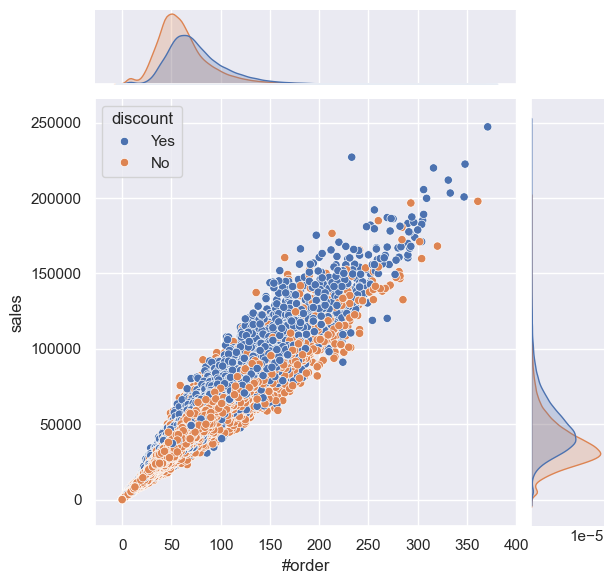

In [83]:
sns.jointplot(data=df_store,x='#order',y='sales',hue='discount')

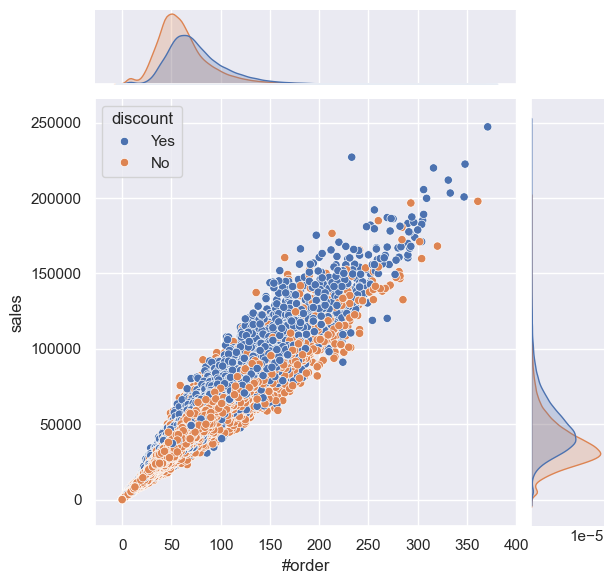

In [84]:
sns.jointplot(data=df_loc,x='#order',y='sales',hue='discount')

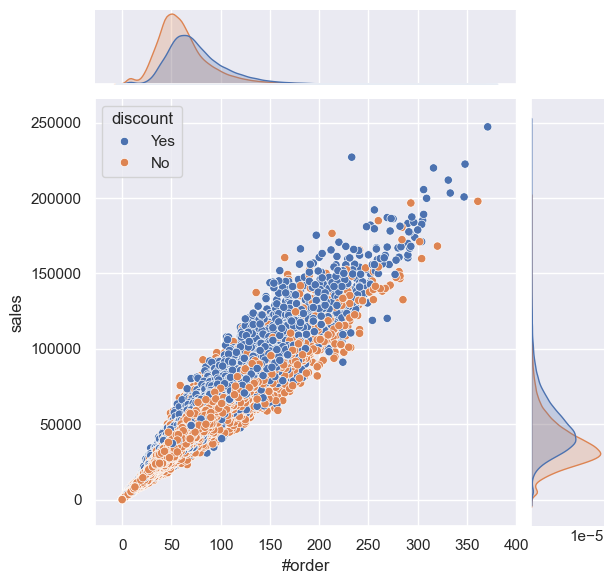

In [85]:
sns.jointplot(data=df_reg,x='#order',y='sales',hue='discount')

### Insights
- Upon analysing the graph on multiple levels viz. store_type, location_type and region_code we find a consistent relationship between the variables
- The distribution of the no.of orders is relatively concentrated
- The distribution of sales is skewed, indicating that majority of sales are relatively small with few larger sales
- The histogram for #order shows that the number of orders is concentrated between 0 and 200, 
- The histogram for sales shows that sales are skewed to the right, with a concentration of smaller sales and a few larger sales
- The kde plot shows higher concentration of no.of orders when there is no discount 
- The kde plot for orders show a wider spread for no.of orders  when there is discount, implying that customers place order for higher no.of quantities more often
- The KDE plot for sales shows that during discount periods customers tend to spend over a wide range of amount

### Other Insights
- Discounts do play an important role in buyer behavior
- During discount periods people place higher no.of orders and spend over a wider range of amount
- The influence of discounts is uniform through store, location and region level


In [42]:
df.columns

Index(['id', 'store_id', 'store_type', 'location_type', 'region_code', 'date',
       'holiday', 'discount', '#order', 'sales', 'day', 'month', 'qtr'],
      dtype='object')

### Analysing the performance and contribution of top 5 stores per Store type

In [86]:
# Group by 'store_id' and 'store_type' and sum 'sales'
store_grouped = df.groupby(['store_id','store_type'])['sales'].sum()

# Convert the Series to a DataFrame
store_grouped = store_grouped.reset_index()

# Sort by 'store_type' and 'sales' in descending order
store_grouped = store_grouped.sort_values(['store_type', 'sales'], ascending=False)

# Get the top 5 stores for each store type
top_5_stores = store_grouped.groupby('store_type').head(5)

In [87]:
#calculating the total sales and contribution of top5 stores
top_5_sales=top_5_stores['sales'].sum()
total_sales=store_grouped['sales'].sum()
other_sales=total_sales-top_5_sales

In [88]:
Top_5_contribution_pct=(top_5_sales/total_sales)*100
Top_5_contribution_pct

7.422094862815541

In [89]:

total_sales=store_grouped.sales.sum()
#Since top 5-stores per store type contribute to 7.4% of total sales
top_5_avg_sales=round((total_sales*0.074)/20,2)
#Total no.of stores in 365 and top-5 store per store cateogry is 20
rest_avg_sales=round((total_sales*0.926)/345,2)


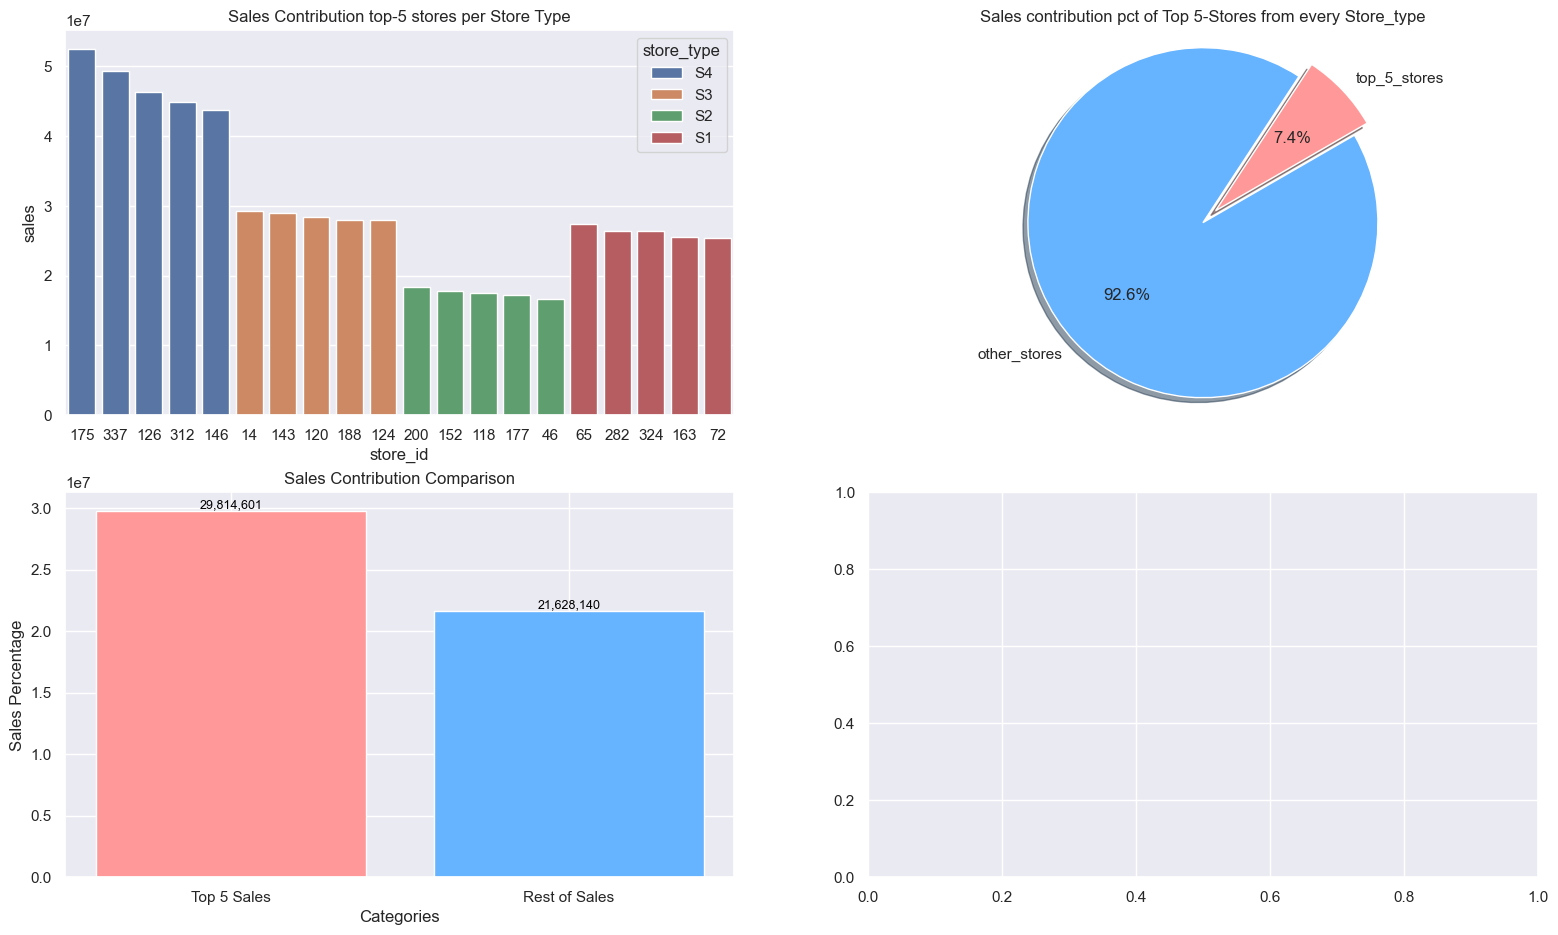

In [92]:
f,ax=plt.subplots(2,2,figsize=(19,11))


sns.barplot(data=top_5_stores,x='store_id',y='sales',hue='store_type',ax=ax[0,0])
ax[0,0].set_title('Sales Contribution top-5 stores per Store Type')


# Plotting the pie chart
size=[top_5_sales,other_sales]
ax[0,1].pie(size,labels=['top_5_stores','other_stores'], colors=['#ff9999','#66b3ff'], autopct='%1.1f%%', startangle=30,explode=[0, 0.1],shadow=True)
ax[0,1].axis('equal')  
ax[0,1].set_title('Sales contribution pct of Top 5-Stores from every Store_type')


#plotting bar chart for comparison with top5 stores
# Sample data from your calculations
categories = ['Top 5 Sales', 'Rest of Sales']
percentages = [top_5_avg_sales, rest_avg_sales]

# Create bar plot
ax[1,0].bar(categories, percentages, color=['#ff9999', '#66b3ff'])
# Add labels
for container in ax[1,0].containers:
    ax[1,0].bar_label(container, labels=[f'{value:,.0f}' for value in container.datavalues], color='black', size=9)


# Add title and labels
ax[1,0].set_title('Sales Contribution Comparison')
ax[1,0].set_xlabel('Categories')
ax[1,0].set_ylabel('Sales Percentage')


plt.show()

plt.show()

### Insights
- S4 is the best performer among various store types with highesh sales value from store ids-175, 337, 126, 312, 416
- S2 has the lowest performance by value of sales
- The top-5 stores contribute to 7.4% of total sales
- The sales contirbuted by Top 5 stores is more than otehr stores by 8 million
- Top 5 stores contribute to 37% more sales than the rest of the block
- For being just 5.2% of the total no.of stores, Top-5 stores contribute to 7.4% of the total revenue

### Analysing the performance and contribution of top 5 stores per Location_type

In [93]:
# Group by 'store_id' and 'location_type' and sum 'sales'
loc_grouped = df.groupby(['store_id','location_type'])['sales'].sum()

# Convert the Series to a DataFrame
loc_grouped = loc_grouped.reset_index()

# Sort by 'store_type' and 'sales' in descending order
loc_grouped = loc_grouped.sort_values(['location_type', 'sales'], ascending=False)

# Get the top 5 stores for each store type
top_5_loc = loc_grouped.groupby('location_type').head(5)



In [94]:
#calculating the total sales and contribution of top5 stores for evey location type
top_5_sales=top_5_loc['sales'].sum()
total_sales=loc_grouped['sales'].sum()
other_sales=total_sales-top_5_sales
top_5_sales

647563751.19

In [95]:
Top_5_contribution_pct=(top_5_sales/total_sales)*100
Top_5_contribution_pct

8.036283500947187

In [96]:

total_sales=loc_grouped.sales.sum()
#Since top 5-stores per store type contribute to 8.03% of total sales
top_5_avg_sales=round((total_sales*0.08)/25,2)
#Total no.of stores in 365 and top-5 store per store cateogry is 25
rest_avg_sales=round((total_sales*0.92)/340,2)


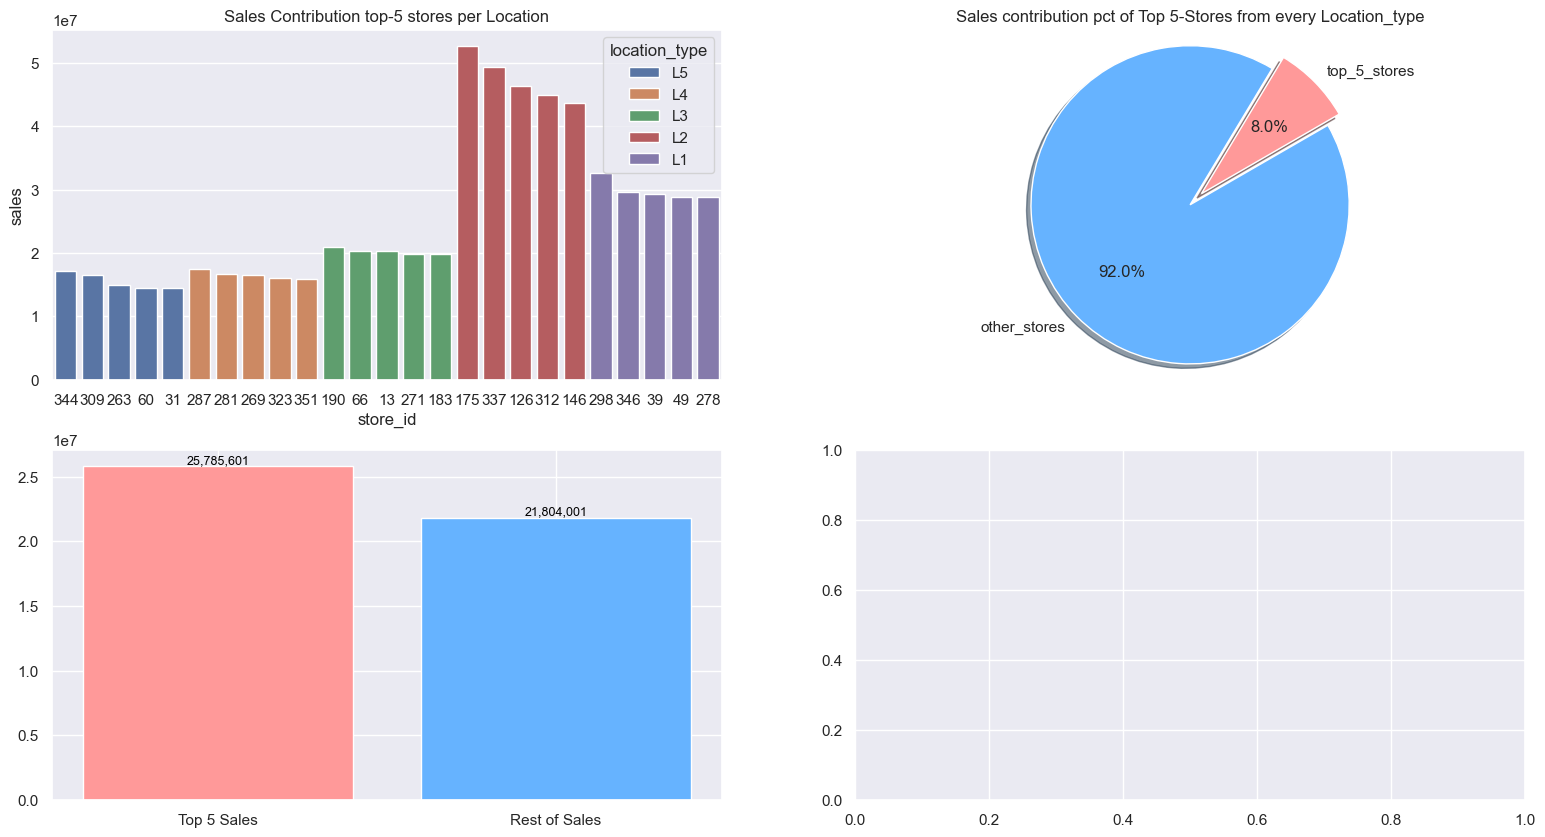

In [97]:
f,ax=plt.subplots(2,2,figsize=(19,10))


sns.barplot(data=top_5_loc,x='store_id',y='sales',hue='location_type',ax=ax[0,0])
ax[0,0].set_title('Sales Contribution top-5 stores per Location')



# Plotting the pie chart
size=[top_5_sales,other_sales]
ax[0,1].pie(size,labels=['top_5_stores','other_stores'], colors=['#ff9999','#66b3ff'], autopct='%1.1f%%', startangle=30,explode=[0, 0.1],shadow=True)
ax[0,1].axis('equal')  
ax[0,1].set_title('Sales contribution pct of Top 5-Stores from every Location_type')



#plotting bar chart for comparison with top5 stores
# Sample data from your calculations
categories = ['Top 5 Sales', 'Rest of Sales']
percentages = [top_5_avg_sales, rest_avg_sales]

# Create bar plot
ax[1,0].bar(categories, percentages, color=['#ff9999', '#66b3ff'])
# Add labels
for container in ax[1,0].containers:
    ax[1,0].bar_label(container, labels=[f'{value:,.0f}' for value in container.datavalues], color='black', size=9)




# Display the plot
plt.show()

plt.show()

### Insights
- L2 is the best performer among various location types with highesh sales value
- L5 has the lowest performance by value of sales
- The top-5 stores contribute to 8% of total sales
- The sales contributed by Top 5 stores is more than other stores by 3.9 million
- Top 5 stores per location contribute to 18% more sales than the rest of the block
- For being just 6.4% of the total no.of stores, Top-5 stores contribute to 8% of the total revenue

### Analysing the performance and contribution of top 5 stores per Region_type

In [98]:
# Group by 'store_id' and 'location_type' and sum 'sales'
reg_grouped = df.groupby(['store_id','region_code'])['sales'].sum()

# Convert the Series to a DataFrame
reg_grouped = reg_grouped.reset_index()

# Sort by 'store_type' and 'sales' in descending order
reg_grouped = reg_grouped.sort_values(['region_code', 'sales'], ascending=False)

# Get the top 5 stores for each store type
top_5_reg = reg_grouped.groupby('region_code').head(5)



In [99]:
#calculating the total sales and contribution of top5 stores for evey location type
top_5_sales=top_5_reg['sales'].sum()
total_sales=reg_grouped['sales'].sum()
other_sales=total_sales-top_5_sales
top_5_sales

733583319.8699999

In [100]:
Top_5_contribution_pct=(top_5_sales/total_sales)*100
Top_5_contribution_pct

9.103788652789525

In [101]:
total_sales=reg_grouped.sales.sum()
#Since top 5-stores per store type contribute to 9% of total sales
top_5_avg_sales=round((total_sales*0.09)/25,2)
#Total no.of stores in 365 and top-5 store per store cateogry is 25
rest_avg_sales=round((total_sales*0.91)/340,2)

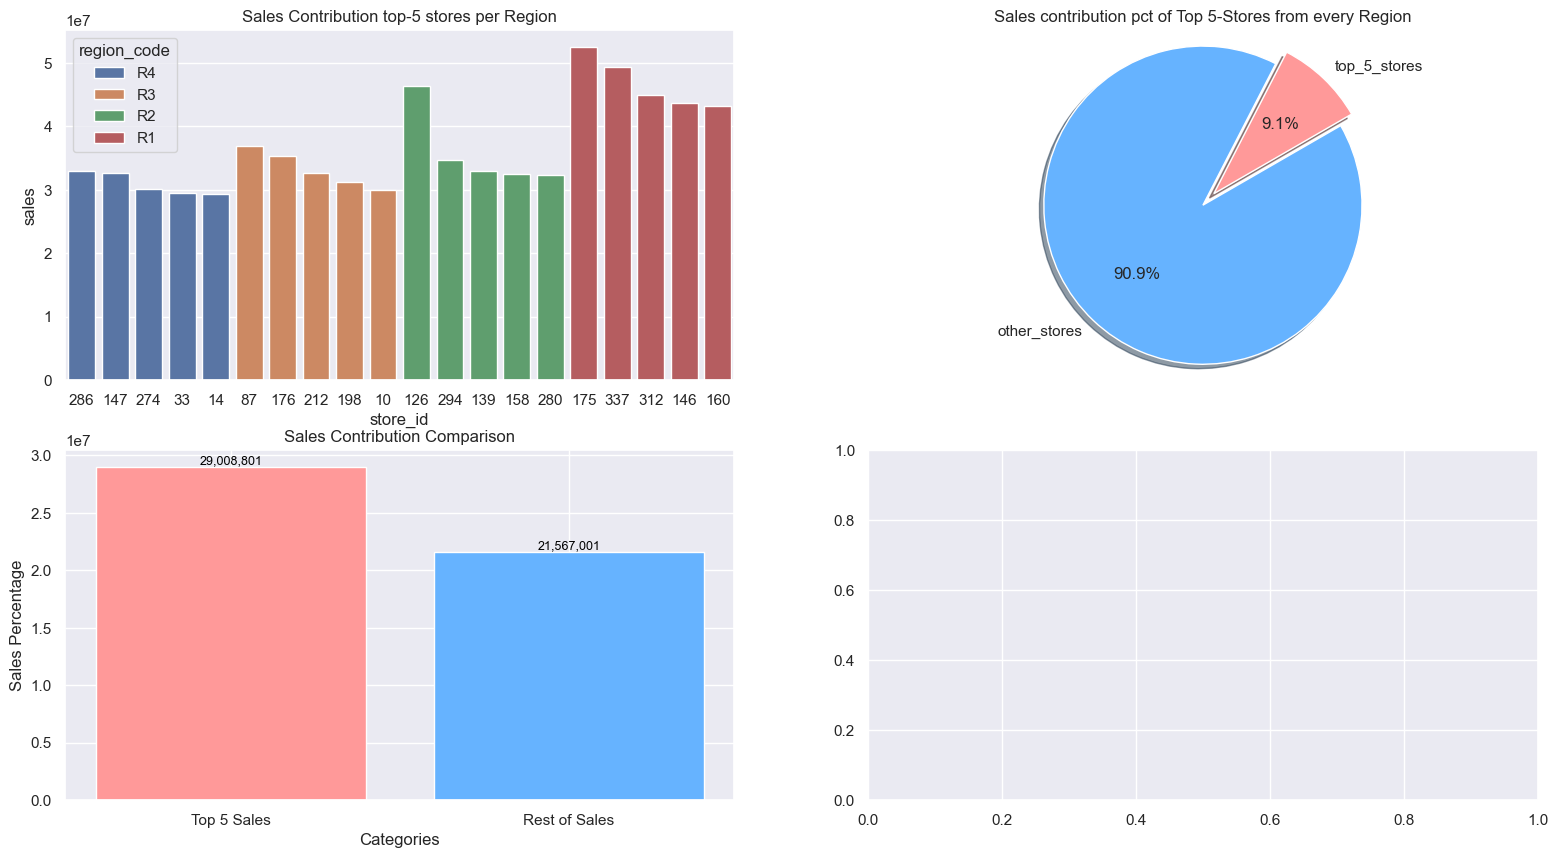

In [102]:
f,ax=plt.subplots(2,2,figsize=(19,10))


sns.barplot(data=top_5_reg,x='store_id',y='sales',hue='region_code',ax=ax[0,0])
ax[0,0].set_title('Sales Contribution top-5 stores per Region')



# Plotting the pie chart
size=[top_5_sales,other_sales]
ax[0,1].pie(size,labels=['top_5_stores','other_stores'], colors=['#ff9999','#66b3ff'], autopct='%1.1f%%', startangle=30,explode=[0, 0.1],shadow=True)
ax[0,1].axis('equal')  
ax[0,1].set_title('Sales contribution pct of Top 5-Stores from every Region')



#plotting bar chart for comparison with top5 stores
# Sample data from your calculations
categories = ['Top 5 Sales', 'Rest of Sales']
percentages = [top_5_avg_sales, rest_avg_sales]

# Create bar plot
ax[1,0].bar(categories, percentages, color=['#ff9999', '#66b3ff'])
# Add labels
for container in ax[1,0].containers:
    ax[1,0].bar_label(container, labels=[f'{value:,.0f}' for value in container.datavalues], color='black', size=9)


# Add title and labels
ax[1,0].set_title('Sales Contribution Comparison')
ax[1,0].set_xlabel('Categories')
ax[1,0].set_ylabel('Sales Percentage')



# Display the plot
plt.show()

plt.show()

### Insights
- R1 is the best performer among various regions with highesh sales value
- R4 has the lowest performance by value of sales
- The top-5 stores contribute to 9.1% of total sales
- The sales contributed by Top 5 stores is more than other stores by 7.4 million
- Top 5 stores per region contribute to 34.5% more sales than the rest of the block
- For being just 5.2% of the total no.of stores, Top-5 stores contribute to 9% of the total revenue

## Data Preprocessing

### Preparing data before feeding it to the Model

In [648]:
#converting discount to proper categorical data type
df['discount']=df['discount'].map({'Yes':1,'No':0})

In [649]:
#creating a new column weekend
df['is_weekend'] = df['day'].apply(lambda x: 1 if x >= 5 else 0)

In [650]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [651]:
#separating target variable
X=df.drop(['sales','id','date','#order'],axis=1)
y=df['sales']


In [652]:
print(y)

0          7011.84
1         51789.12
2         36868.20
3         19715.16
4         45614.52
            ...   
188335    37272.00
188336    54572.64
188337    31624.56
188338    49162.41
188339    37977.00
Name: sales, Length: 188340, dtype: float64


In [653]:
# Step 4: Identifying numerical and categorical columns
numerical_cols = ['holiday', 'discount', 'day', 'month', 'qtr','is_weekend']
categorical_cols = ['store_id', 'store_type', 'location_type', 'region_code']  # 'store_id' treated as categorical


In [654]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Standardize numerical columns
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # One-hot encode categorical columns
    ])

In [655]:
X=preprocessor.fit_transform(X)

In [656]:
X.shape

(188340, 380)

In [657]:
y.shape

(188340,)

#### Splitting the dataset in train and test set

In [658]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 42)

In [659]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150672, 380)
(37668, 380)
(150672,)
(37668,)


In [660]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


In [661]:
#importing the necessary performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [662]:
#creating instance for the class
models={
    'lr' : LinearRegression(),
    'rf' : RandomForestRegressor(),
    'gb' : GradientBoostingRegressor(),
    'xgb' : XGBRegressor(),
    'dt' : DecisionTreeRegressor(),
    'l1' : Lasso(),
    'l2' : Ridge()

}

In [663]:
model_list=[]
Accuracy=[]

for i in  range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    #Making Predictions
    y_train_pred=model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Training set performance
    mae_train = mean_absolute_error(y_train,y_train_pred)
    mse_train = mean_squared_error(y_train,y_train_pred)
    r2_train = r2_score(y_train,y_train_pred)

    #Test Set Performance
    mae_test = mean_absolute_error(y_test,y_test_pred)
    mse_test = mean_squared_error(y_test,y_test_pred)
    r2_test = r2_score(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('Model Performance for Training Set')
    print(" - MAE: {:.4f}".format(mae_train))
    print(" - MSE: {:.4f}".format(mse_train))
    print(" - R2 Score: {:.4f}".format(r2_train))

    print ('-------------------------------------------')
    print('Model Performance for Test Set')
    print(" - MAE: {:.4f}".format(mae_test))
    print(" - MSE: {:.4f}".format(mse_test))
    print(" - R2 Score: {:.4f}".format(r2_test))

    print('='*35)
    print('\n')



lr
Model Performance for Training Set
 - MAE: 7513.8259
 - MSE: 115247931.7860
 - R2 Score: 0.6623
-------------------------------------------
Model Performance for Test Set
 - MAE: 7547.2910
 - MSE: 115425586.4723
 - R2 Score: 0.6586


rf
Model Performance for Training Set
 - MAE: 4822.6171
 - MSE: 50023307.9359
 - R2 Score: 0.8534
-------------------------------------------
Model Performance for Test Set
 - MAE: 7603.6553
 - MSE: 117820839.9988
 - R2 Score: 0.6515


gb
Model Performance for Training Set
 - MAE: 7413.3877
 - MSE: 111190696.6589
 - R2 Score: 0.6742
-------------------------------------------
Model Performance for Test Set
 - MAE: 7407.7945
 - MSE: 111529285.2038
 - R2 Score: 0.6701


xgb
Model Performance for Training Set
 - MAE: 6547.2729
 - MSE: 86309345.5649
 - R2 Score: 0.7471
-------------------------------------------
Model Performance for Test Set
 - MAE: 6712.7117
 - MSE: 91972984.3974
 - R2 Score: 0.7280


dt
Model Performance for Training Set
 - MAE: 4326.129

In [664]:
pd.DataFrame(list(zip(model_list, Accuracy)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'],ascending=False)

Empty DataFrame
Columns: [Model Name, Accuracy]
Index: []

### Hyper Parameter Tuning

In [707]:
params= {
    'n_estimators': [5,10,20,50,70,100,200,250,300,350,400,450],
    'max_depth': [3, 4, 5, 6, 7],

    'learning_rate':[0.3,0.4,0.6,0.8,0.9,1.0,2.0],
    'booster':['gbtree'],
          
}


In [708]:
randomcv_models = [
    ('xgb',XGBRegressor(),params)
]
randomcv_models

[('xgb',
  XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
  {'n_estimators': [5, 10, 20, 50, 70, 100, 200, 250, 300, 350, 400, 450],
   'max_depth': [3, 4, 5, 6, 7],
   'learning_rate': [0.3, 0.4, 0.6, 0.8, 0.9, 1.0, 2.0],
   'booster': ['gbtree']})]

In [709]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name,model,params in randomcv_models:
        random = RandomizedSearchCV(estimator = model,
                           param_distributions = params,
                           n_iter = 100,
                           scoring = 'neg_mean_squared_error',
                           cv=3)
    
        random.fit(X_train,y_train)
        model_param[name]= random.best_params_
    
for model_name in model_param:
    print(f"-------------------- Best Params for {model_name}-----------")
    print(model_param[model_name])

-------------------- Best Params for xgb-----------
{'n_estimators': 350, 'max_depth': 4, 'learning_rate': 0.6, 'booster': 'gbtree'}


In [711]:
random.fit(X_train,y_train)

print("Best Params:", random.best_params_)
print("Best score:", random.best_score_)

Best Params: {'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.8, 'booster': 'gbtree'}
Best score: -87628437.31888354


In [712]:
y_pred = random.predict(X_test)

In [713]:
r2_score(y_pred,y_test)

0.6686037091086026

In [678]:
dfx=pd.read_csv("C:/Users/sahay/Downloads/TEST_FINAL.csv")

In [679]:
dfx.head()

ID  Store_id Store_Type Location_Type Region_Code        Date  \
0  T1188341       171         S4            L2          R3  2019-06-01   
1  T1188342       172         S1            L1          R1  2019-06-01   
2  T1188343       173         S4            L2          R1  2019-06-01   
3  T1188344       174         S1            L1          R4  2019-06-01   
4  T1188345       170         S1            L1          R2  2019-06-01   

   Holiday Discount  
0        0       No  
1        0       No  
2        0       No  
3        0       No  
4        0       No

In [680]:
dfx.shape

(22265, 8)

In [681]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


### Performing relevant changes to the data

In [682]:

#converting all column names to lower case
dfx.columns=dfx.columns.str.lower()

#changing date column data type
dfx['date']=pd.to_datetime(dfx['date'])
dfx['store_id']=dfx['store_id'].astype(str)

#ecreating date, month and quarter columns
dfx['day']=df['date'].dt.dayofweek
dfx['month']=df['date'].dt.month
dfx['qtr']=df['date'].dt.quarter
dfx['is_weekend'] = dfx['day'].apply(lambda x: 1 if x >= 5 else 0)

#dropping irrelevant columns
dfx=dfx.drop(['id','date'],axis=1)



In [683]:
#converting discount to proper categorical data type
dfx['discount']=dfx['discount'].map({'Yes':1,'No':0})

In [684]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             188340 non-null  object        
 1   store_id       188340 non-null  object        
 2   store_type     188340 non-null  object        
 3   location_type  188340 non-null  object        
 4   region_code    188340 non-null  object        
 5   date           188340 non-null  datetime64[ns]
 6   holiday        188340 non-null  int64         
 7   discount       188340 non-null  int64         
 8   #order         188340 non-null  int64         
 9   sales          188340 non-null  float64       
 10  day            188340 non-null  int32         
 11  month          188340 non-null  int32         
 12  qtr            188340 non-null  int32         
 13  is_weekend     188340 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(4)

In [685]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   store_id       22265 non-null  object
 1   store_type     22265 non-null  object
 2   location_type  22265 non-null  object
 3   region_code    22265 non-null  object
 4   holiday        22265 non-null  int64 
 5   discount       22265 non-null  int64 
 6   day            22265 non-null  int32 
 7   month          22265 non-null  int32 
 8   qtr            22265 non-null  int32 
 9   is_weekend     22265 non-null  int64 
dtypes: int32(3), int64(3), object(4)
memory usage: 1.4+ MB


In [686]:
test_prepared=preprocessor.transform(dfx)